In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

import shap
import random

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# <font color='red'> Use Linear Regression

## <font color='blue'> Preprocessing

### <font color = "green"> Preprocessing: Load and show dataset

In [3]:
data = pd.read_csv("weather_prediction_dataset.csv")
data

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     20000101      1                  8            0.89          1.0286   
1     20000102      1                  8            0.87          1.0318   
2     20000103      1                  5            0.81          1.0314   
3     20000104      1                  7            0.79          1.0262   
4     20000105      1                  5            0.90          1.0246   
...        ...    ...                ...             ...             ...   
3649  20091228     12                  7            0.82          1.0084   
3650  20091229     12                  7            0.92          1.0028   
3651  20091230     12                  8            0.92          0.9979   
3652  20091231     12                  7            0.93          0.9958   
3653  20100101      1                  8            0.93          0.9965   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.20                 0.03             0.0   
1                       0.25                 0.00             0.0   
2                       0.50                 0.00             3.7   
3                       0.63                 0.35             6.9   
4                       0.51                 0.07             3.7   
...                      ...                  ...             ...   
3649                    0.28                 0.42             0.3   
3650                    0.22                 1.68             0.2   
3651                    0.07                 1.54             0.0   
3652                    0.17                 0.57             0.1   
3653                    0.08                 0.56             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BUDAPEST_cloud_cover  \
0                 2.9             1.6             3.9                     3   
1                 3.6             2.7             4.8                     8   
2                 2.2             0.1             4.8                     6   
3                 3.9             0.5             7.5                     8   
4                 6.0             3.8             8.6                     5   
...               ...             ...             ...                   ...   
3649              3.2             1.0             4.8                     1   
3650              4.5             2.4            10.0                     3   
3651              8.5             7.5            11.5                     8   
3652              6.6             4.3             7.9                     6   
3653              2.9            -0.2             4.8                     6   

      BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0                  0.92             1.0268                       0.52   
1                  0.94             1.0297                       0.14   
2                  0.95             1.0295                       0.19   
3                  0.94             1.0252                       0.21   
4                  0.88             1.0235                       0.43   
...                 ...                ...                        ...   
3649               0.61             1.0072                       0.65   
3650               0.59             1.0113                       0.68   
3651               0.93             1.0040                       0.18   
3652               0.90             0.9984                       0.30   
3653               0.65             1.0169                       0.31   

      BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                       0.00                3.7                -4.9   
1                       0.00                0.4                -3.6   
2                       0.00                0.0                -0.8   
3                       0.00                0.0                -1.0   
4                       0.00                0.8                 0.2   
...             

### <font color = "green"> Preprocessing: Convert column DATE into international date format

In [4]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Convert Date into a string format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d')
print(data['DATE'])


0       2000-01-01
1       2000-01-02
2       2000-01-03
3       2000-01-04
4       2000-01-05
           ...    
3649    2009-12-28
3650    2009-12-29
3651    2009-12-30
3652    2009-12-31
3653    2010-01-01
Name: DATE, Length: 3654, dtype: object


### <font color = "green"> Preprocessing: Rename the city of "DE_BILT" to "DEBILT" to better handle it

In [5]:
data.columns = data.columns.map(lambda x: x.replace('DE_BILT', 'DEBILT'))
data

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     2000-01-01      1                  8            0.89          1.0286   
1     2000-01-02      1                  8            0.87          1.0318   
2     2000-01-03      1                  5            0.81          1.0314   
3     2000-01-04      1                  7            0.79          1.0262   
4     2000-01-05      1                  5            0.90          1.0246   
...          ...    ...                ...             ...             ...   
3649  2009-12-28     12                  7            0.82          1.0084   
3650  2009-12-29     12                  7            0.92          1.0028   
3651  2009-12-30     12                  8            0.92          0.9979   
3652  2009-12-31     12                  7            0.93          0.9958   
3653  2010-01-01      1                  8            0.93          0.9965   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.20                 0.03             0.0   
1                       0.25                 0.00             0.0   
2                       0.50                 0.00             3.7   
3                       0.63                 0.35             6.9   
4                       0.51                 0.07             3.7   
...                      ...                  ...             ...   
3649                    0.28                 0.42             0.3   
3650                    0.22                 1.68             0.2   
3651                    0.07                 1.54             0.0   
3652                    0.17                 0.57             0.1   
3653                    0.08                 0.56             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BUDAPEST_cloud_cover  \
0                 2.9             1.6             3.9                     3   
1                 3.6             2.7             4.8                     8   
2                 2.2             0.1             4.8                     6   
3                 3.9             0.5             7.5                     8   
4                 6.0             3.8             8.6                     5   
...               ...             ...             ...                   ...   
3649              3.2             1.0             4.8                     1   
3650              4.5             2.4            10.0                     3   
3651              8.5             7.5            11.5                     8   
3652              6.6             4.3             7.9                     6   
3653              2.9            -0.2             4.8                     6   

      BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0                  0.92             1.0268                       0.52   
1                  0.94             1.0297                       0.14   
2                  0.95             1.0295                       0.19   
3                  0.94             1.0252                       0.21   
4                  0.88             1.0235                       0.43   
...                 ...                ...                        ...   
3649               0.61             1.0072                       0.65   
3650               0.59             1.0113                       0.68   
3651               0.93             1.0040                       0.18   
3652               0.90             0.9984                       0.30   
3653               0.65             1.0169                       0.31   

      BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                       0.00                3.7                -4.9   
1                       0.00                0.4                -3.6   
2                       0.00                0.0                -0.8   
3                       0.00                0.0                -1.0   
4                       0.00                0.8                 0

### <font color = "green"> Preprocessing: Check data types

In [6]:
data.dtypes

DATE                       object
MONTH                       int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
                           ...   
TOURS_global_radiation    float64
TOURS_precipitation       float64
TOURS_temp_mean           float64
TOURS_temp_min            float64
TOURS_temp_max            float64
Length: 165, dtype: object

In [7]:
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns

# Print the columns that are not int64 or float64
if len(non_numeric_columns) > 0:
    print("Columns that are not int64 or float64:")
    print(non_numeric_columns)
else:
    print("All columns are either int64 or float64.")


Columns that are not int64 or float64:
Index(['DATE'], dtype='object')


### <font color = "green"> Preprocessing: Check for missing values

In [8]:
missing_values = data.isnull().sum()
print(sum(missing_values))

0


### <font color = "green"> Preprocessing: Check distribution of data to look for "strange" values

In [9]:
data.describe()

MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
count  3654.000000        3654.000000     3654.000000     3654.000000   
mean      6.520799           5.418446        0.745107        1.017876   
std       3.450083           2.325497        0.107788        0.007962   
min       1.000000           0.000000        0.380000        0.985600   
25%       4.000000           4.000000        0.670000        1.013300   
50%       7.000000           6.000000        0.760000        1.017700   
75%      10.000000           7.000000        0.830000        1.022700   
max      12.000000           8.000000        0.980000        1.040800   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
count             3654.000000          3654.000000     3654.000000   
mean                 1.330380             0.234849        4.661193   
std                  0.935348             0.536267        4.330112   
min                  0.050000             0.000000        0.000000   
25%                  0.530000             0.000000        0.500000   
50%                  1.110000             0.000000        3.600000   
75%                  2.060000             0.210000        8.000000   
max                  3.550000             7.570000       15.300000   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BUDAPEST_cloud_cover  \
count      3654.000000     3654.000000     3654.000000           3654.000000   
mean         11.022797        6.989135       15.536782              4.890531   
std           7.414754        6.653356        8.721323              2.386442   
min          -9.300000      -16.000000       -5.700000              0.000000   
25%           5.300000        2.000000        8.700000              3.000000   
50%          11.400000        7.300000       15.800000              5.000000   
75%          16.900000       12.400000       22.300000              7.000000   
max          29.000000       20.800000       38.600000              8.000000   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
count        3654.000000        3654.000000                3654.000000   
mean            0.656505           1.016935                   1.465487   
std             0.149603           0.007795                   0.977986   
min             0.260000           0.989100                   0.040000   
25%             0.540000           1.012100                   0.580000   
50%             0.650000           1.016500                   1.340000   
75%             0.770000           1.021475                   2.310000   
max             1.000000           1.043800                   3.490000   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
count             3654.000000        3654.000000         3654.000000   
mean                 0.136442           5.753229           12.174849   
std                  0.408932           4.475439            8.744451   
min                  0.000000           0.000000           -9.800000   
25%                  0.000000           1.100000            5.100000   
50%                  0.000000           5.900000           12.800000   
75%                  0.030000           9.600000           19.300000   
max                  6.960000          14.900000           33.100000   

       BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_wind_speed  \
count        3654.000000         3654.000000        3654.000000   
mean           16.629091            5.303229           3.395293   
std             9.981538            2.279416           1.422020   
min            -6.600000            0.000000           0.700000   
25%             8.400000            4.000000           2.300000   
50%            17.400000            6.000000           3.200000   
75%            25.000000            7.000000           4.200000   
max            40.100000            8.000000          10.300000   

       DEBILT_wind_gust  DEBILT_humidity  DEBILT_pressure  \
count       3654.00000

Summary Statistics for global_radiation across cities:
             BASEL     BUDAPEST       DEBILT      DRESDEN   DUSSELDORF  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      1.330380     1.465487     1.190903     1.263432     1.147362   
std       0.935348     0.977986     0.870267     0.936443     0.880692   
min       0.050000     0.040000     0.110000     0.030000     0.110000   
25%       0.530000     0.580000     0.410000     0.440000     0.380000   
50%       1.110000     1.340000     1.020000     1.090000     0.920000   
75%       2.060000     2.310000     1.860000     1.980000     1.780000   
max       3.550000     3.490000     3.410000     3.660000     3.490000   

          HEATHROW       KASSEL    LJUBLJANA   MAASTRICHT   MONTELIMAR  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      1.196970     1.183087     1.414031     1.193410     1.647783   
std       0.881638     0.882655     1.000020     0.90293

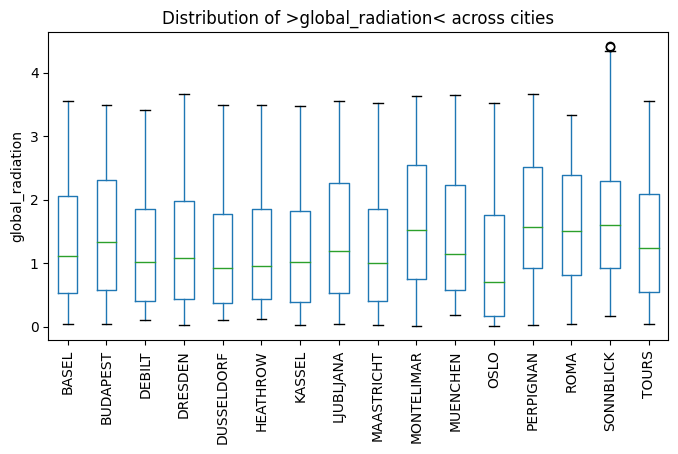


****************************************************************************************************

Summary Statistics for cloud_cover across cities:
             BASEL     BUDAPEST       DEBILT      DRESDEN   DUSSELDORF  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      5.418446     4.890531     5.303229     5.405036     5.141762   
std       2.325497     2.386442     2.279416     2.194769     2.115639   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.000000     3.000000     4.000000     4.000000     4.000000   
50%       6.000000     5.000000     6.000000     6.000000     6.000000   
75%       7.000000     7.000000     7.000000     7.000000     7.000000   
max       8.000000     8.000000     8.000000     8.000000     8.000000   

          HEATHROW    LJUBLJANA   MAASTRICHT     MUENCHEN         OSLO  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      5.272031     4.930213 

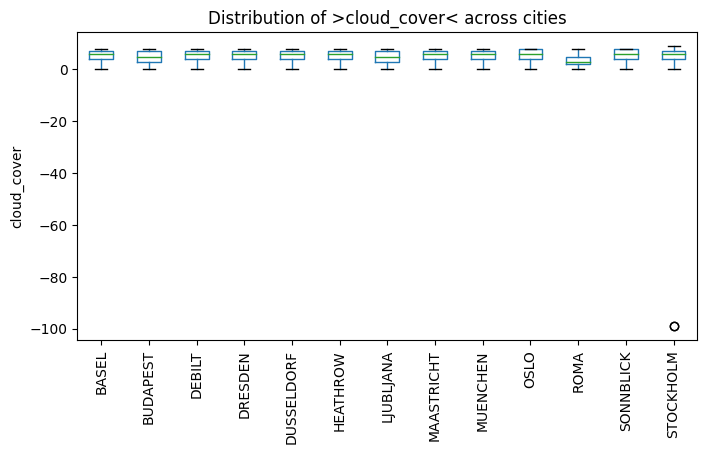


****************************************************************************************************

Summary Statistics for temp_max across cities:
             BASEL     BUDAPEST       DEBILT      DRESDEN   DUSSELDORF  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean     15.536782    16.629091    14.798604    13.671346    15.312014   
std       8.721323     9.981538     7.210740     9.038833     7.778961   
min      -5.700000    -6.600000    -4.700000   -13.600000    -8.500000   
25%       8.700000     8.400000     9.200000     6.300000     9.300000   
50%      15.800000    17.400000    14.900000    13.900000    15.400000   
75%      22.300000    25.000000    20.200000    20.900000    21.200000   
max      38.600000    40.100000    35.700000    36.400000    38.500000   

          HEATHROW       KASSEL    LJUBLJANA   MAASTRICHT        MALMO  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean     15.637438    13.821702    

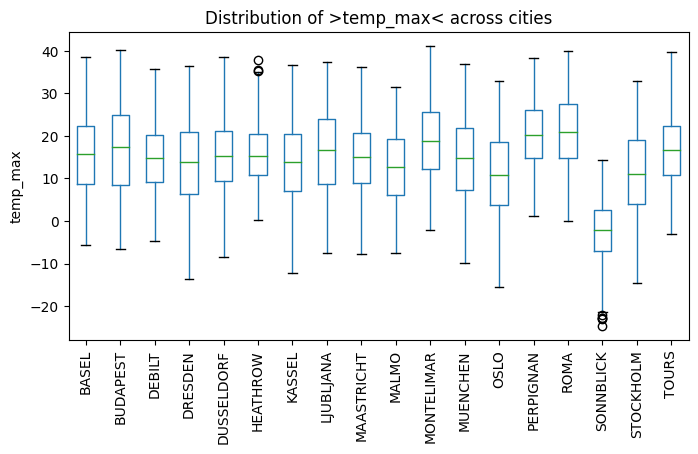


****************************************************************************************************

Summary Statistics for sunshine across cities:
             BASEL     BUDAPEST       DEBILT      DRESDEN   DUSSELDORF  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      4.661193     5.753229     4.744444     4.815736     4.324111   
std       4.330112     4.475439     3.995637     4.426682     4.209463   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.500000     1.100000     1.100000     0.600000     0.400000   
50%       3.600000     5.900000     4.100000     3.900000     3.200000   
75%       8.000000     9.600000     7.500000     8.200000     7.300000   
max      15.300000    14.900000    15.500000    15.800000    16.000000   

          HEATHROW       KASSEL    LJUBLJANA   MAASTRICHT     MUENCHEN  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      4.433498     4.136836    

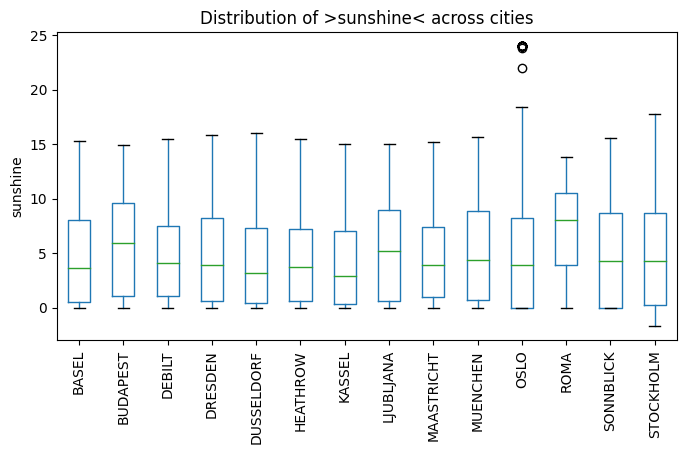


****************************************************************************************************

Summary Statistics for precipitation across cities:
             BASEL     BUDAPEST       DEBILT      DRESDEN   DUSSELDORF  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      0.234849     0.136442     0.236888     0.175881     0.218043   
std       0.536267     0.408932     0.459495     0.459725     0.439578   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.010000     0.000000     0.010000   
75%       0.210000     0.030000     0.290000     0.170000     0.250000   
max       7.570000     6.960000     4.250000    15.800000     5.740000   

          HEATHROW       KASSEL    LJUBLJANA   MAASTRICHT        MALMO  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      0.178279     0.20221

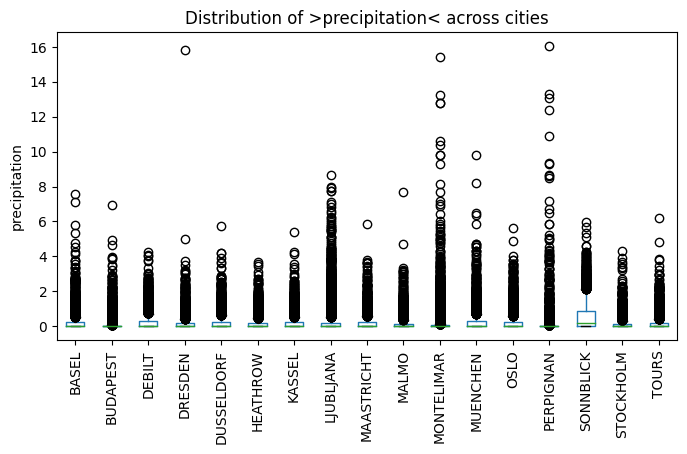


****************************************************************************************************

Summary Statistics for temp_min across cities:
             BASEL       DEBILT      DRESDEN   DUSSELDORF     HEATHROW  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      6.989135     6.397099     5.924056     6.865736     8.002737   
std       6.653356     5.639597     6.934514     6.150650     5.230449   
min     -16.000000   -14.400000   -20.400000   -19.900000    -6.800000   
25%       2.000000     2.300000     0.800000     2.500000     4.100000   
50%       7.300000     6.800000     6.300000     7.300000     8.250000   
75%      12.400000    10.800000    11.500000    11.600000    12.100000   
max      20.800000    20.800000    23.500000    21.500000    20.600000   

            KASSEL    LJUBLJANA   MAASTRICHT        MALMO   MONTELIMAR  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      5.586864     7.071757    

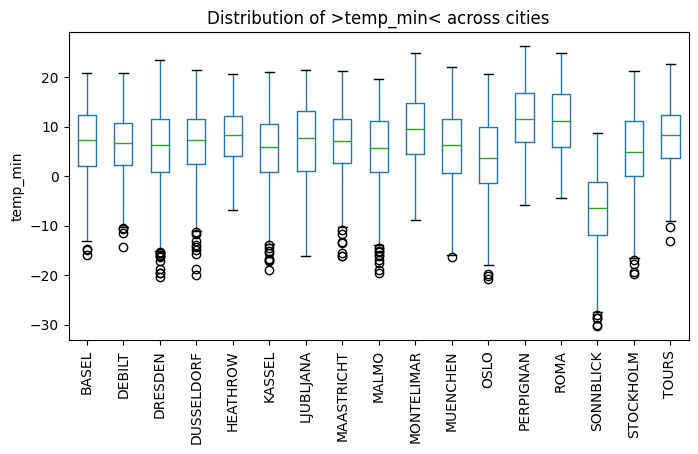


****************************************************************************************************

Summary Statistics for wind_speed across cities:
            DEBILT      DRESDEN   DUSSELDORF       KASSEL    LJUBLJANA  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      3.395293     4.256924     3.963738     2.478079     1.301423   
std       1.422020     1.775045     1.718106     0.999386     0.629852   
min       0.700000     1.000000     1.000000     0.000000     0.100000   
25%       2.300000     2.900000     2.600000     1.700000     0.800000   
50%       3.200000     3.900000     3.700000     2.300000     1.200000   
75%       4.200000     5.200000     5.000000     3.000000     1.600000   
max      10.300000    12.200000    12.200000     7.600000     5.100000   

        MAASTRICHT        MALMO   MONTELIMAR     MUENCHEN         OSLO  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      4.205720     2.918035  

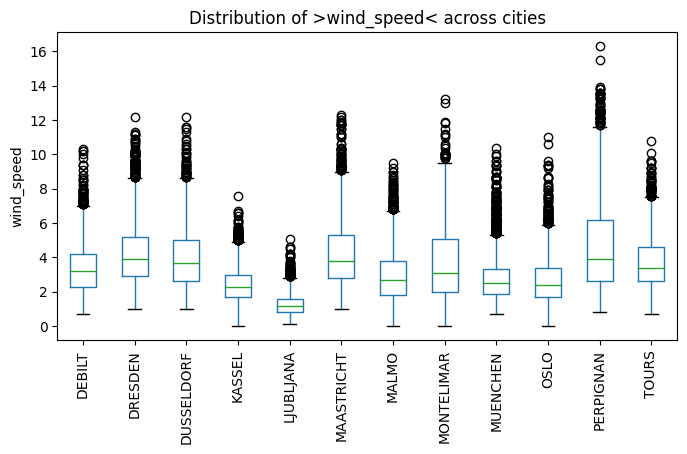


****************************************************************************************************

Summary Statistics for pressure across cities:
             BASEL     BUDAPEST       DEBILT   DUSSELDORF     HEATHROW  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      1.017876     1.016935     1.015299     1.016000     1.015192   
std       0.007962     0.007795     0.009861     0.009302     0.010561   
min       0.985600     0.989100     0.973200     0.975900     0.971500   
25%       1.013300     1.012100     1.009400     1.010400     1.009000   
50%       1.017700     1.016500     1.015700     1.016200     1.016000   
75%       1.022700     1.021475     1.021700     1.021800     1.022100   
max       1.040800     1.043800     1.044900     1.045000     1.043800   

            KASSEL    LJUBLJANA   MAASTRICHT   MONTELIMAR     MUENCHEN  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      1.016373     1.017947    

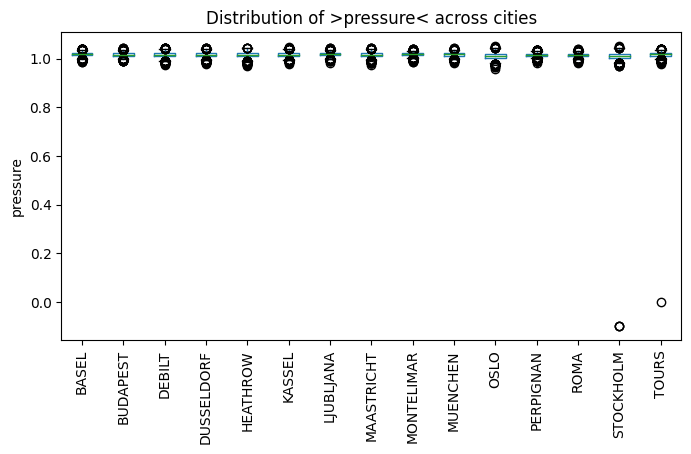


****************************************************************************************************

Summary Statistics for wind_gust across cities:
            DEBILT      DRESDEN   DUSSELDORF       KASSEL   MAASTRICHT  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      9.986316    10.924576    10.591680     9.329557    10.729338   
std       3.582408     4.031649     3.884296     3.373451     4.069453   
min       2.000000     2.900000     2.800000     2.100000     3.000000   
25%       7.000000     8.000000     7.800000     6.900000     8.000000   
50%      10.000000    10.300000    10.100000     8.900000    10.000000   
75%      12.000000    13.200000    12.700000    11.200000    13.000000   
max      28.000000    34.300000    40.300000    41.000000    31.000000   

          MUENCHEN         OSLO  
count  3654.000000  3654.000000  
mean      9.769814     9.094800  
std       4.291187     3.471479  
min       2.600000     1.500000  
25%       6.

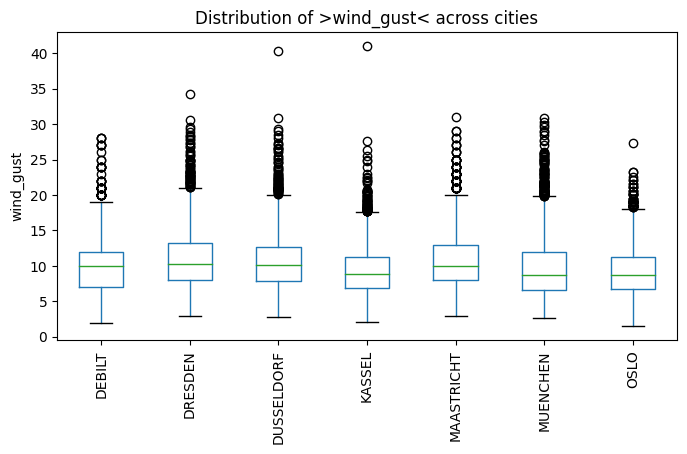


****************************************************************************************************

Summary Statistics for temp_mean across cities:
             BASEL     BUDAPEST      DEBILT      DRESDEN   DUSSELDORF  \
count  3654.000000  3654.000000  3654.00000  3654.000000  3654.000000   
mean     11.022797    12.174849    10.70353     9.800629    11.142009   
std       7.414754     8.744451     6.19077     7.854752     6.689373   
min      -9.300000    -9.800000    -7.90000   -16.300000   -11.100000   
25%       5.300000     5.100000     6.20000     3.700000     6.125000   
50%      11.400000    12.800000    11.00000    10.200000    11.500000   
75%      16.900000    19.300000    15.50000    16.100000    16.200000   
max      29.000000    33.100000    26.90000    30.400000    29.200000   

          HEATHROW       KASSEL    LJUBLJANA   MAASTRICHT        MALMO  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean     11.822386     9.581007    11.51160

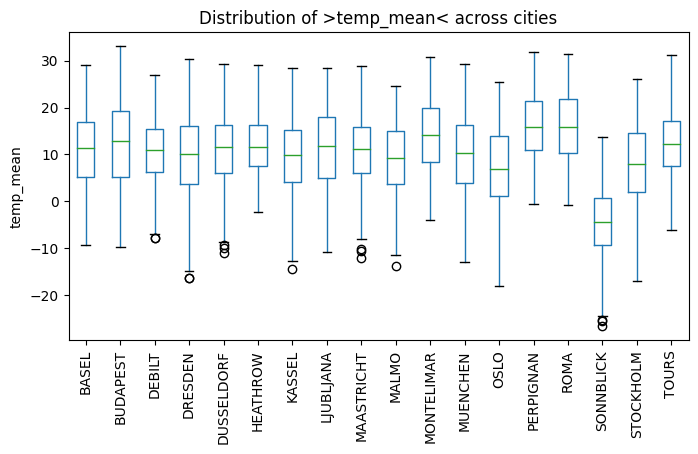


****************************************************************************************************

Summary Statistics for humidity across cities:
             BASEL     BUDAPEST       DEBILT      DRESDEN   DUSSELDORF  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      0.745107     0.656505     0.817882     0.759023     0.755744   
std       0.107788     0.149603     0.097465     0.132420     0.111595   
min       0.380000     0.260000     0.370000     0.320000     0.260000   
25%       0.670000     0.540000     0.760000     0.670000     0.690000   
50%       0.760000     0.650000     0.830000     0.770000     0.770000   
75%       0.830000     0.770000     0.890000     0.860000     0.840000   
max       0.980000     1.000000     1.000000     1.000000     1.000000   

          HEATHROW       KASSEL    LJUBLJANA   MAASTRICHT   MONTELIMAR  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean      0.758358     0.785200    

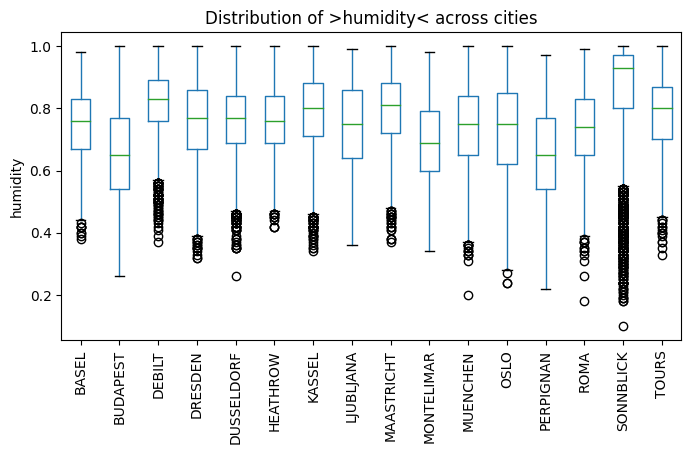


****************************************************************************************************



In [10]:
# Step 1: Extract unique weather characteristics (e.g., 'cloud_cover', 'temp_mean') and cities
# Split the column names, ensuring the city is identified by its capital letters
weather_characs = set([col.split('_', 1)[1] for col in data.columns if '_' in col])
cities = set([col.split('_', 1)[0] for col in data.columns if col.split('_', 1)[0].isupper()])

# Step 2: Loop through each weather characteristic and extract data for each city
for weather_charac in weather_characs:
    # Extract the cities that have this weather characteristic
    city_columns = [col for col in data.columns if col.endswith(f"_{weather_charac}")]
    
    # Create a DataFrame that contains the variable data for each city
    variable_data = pd.DataFrame()
    
    for col in city_columns:
        # Extract the city name by looking for the capital letters before the underscore
        city = col.split('_', 1)[0]
        # Add the city's data to the DataFrame
        variable_data[city] = data[col]
    
    # Step 3: Generate descriptive statistics
    if not variable_data.empty:
        summary_stats = variable_data.describe()
        print(f"Summary Statistics for {weather_charac} across cities:")
        print(summary_stats)
        
        # Step 4: Visualize the distribution of the variable across cities using box plots
        plt.figure(figsize=(8, 4))
        variable_data.boxplot()
        plt.title(f"Distribution of >{weather_charac}< across cities")
        plt.ylabel(f"{weather_charac}")
        plt.xticks(rotation=90)
        plt.grid(False)
        plt.show()
        print("\n" + "*" * 100 + "\n")
    else:
        print(f"No data found for {weather_charac} across cities.")


### <font color='orange'> 1) Minimum CLOUD COVER for STOCKHOLM of -99 is obviously wrong -> impute mean value (as Ridge can't handle missing values)
### <font color='orange'> 2) Maximum SUNSHINE of 24 h in OSLO is not possible, but 20 h are -> maybe measured in "sunlight"???
### <font color='orange'> 3) Minimum PRESSURE for STOCKHOLM (-0.099 = -99 hPa) and TOURS (0.0003 = 0.3 hPa) are obviously wrong -> impute mean value (as Ridge can't handle missing values)
### <font color='orange'> 4) Maximum CLOUD COVER for STOCKHOLM of 9 means "sky view obstructed" -> impute mean value (as Ridge can't handle missing values)

In [11]:
# Calculate the mean of the 'STOCKHOLM_cloud_cover' column (excluding -99)
mean_value = data['STOCKHOLM_cloud_cover'].replace(-99, np.nan).mean()

# Replace -99 with the mean value
data['STOCKHOLM_cloud_cover'] = data['STOCKHOLM_cloud_cover'].replace(-99, mean_value)
data['STOCKHOLM_cloud_cover'].min()

0.0

In [12]:
# Calculate the mean of the 'STOCKHOLM_pressure' column (excluding -0.099)
mean_value = data['STOCKHOLM_pressure'].replace(-0.099, np.nan).mean()

# Replace -0.099 with the mean value
data['STOCKHOLM_pressure'] = data['STOCKHOLM_pressure'].replace(-0.099, mean_value)
data['STOCKHOLM_pressure'].min()

0.9687

In [13]:
# Calculate the mean of the 'TOURS_pressure' column (excluding 0.0003)
mean_value = data['TOURS_pressure'].replace(0.0003, np.nan).mean()

# Replace 0.0003 with the mean value
data['TOURS_pressure'] = data['TOURS_pressure'].replace(0.0003, mean_value)
data['TOURS_pressure'].min()

0.9762

In [14]:
# Calculate the mean of the 'STOCKHOLM_cloud_cover' column (excluding 9)
mean_value = data['STOCKHOLM_cloud_cover'].replace(9, np.nan).mean()

# Replace 9 with the mean value
data['STOCKHOLM_cloud_cover'] = data['STOCKHOLM_cloud_cover'].replace(9, mean_value)
data['STOCKHOLM_cloud_cover'].max()

8.0

### <font color='green'> Save to pickle

In [15]:
pd.to_pickle(data, "weather_prediction_dataset_cleaned.pkl")

## <font color='blue'> Start with Linear Regression for one city

In [16]:
# Select features and target for Basel (excluding 'BASEL_sunshine')
# Use all Basel-related features except for 'BASEL_sunshine'
feature_columns = ['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 
                   'BASEL_global_radiation', 'BASEL_precipitation', 
                   'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']

X = data[feature_columns]  # Features for Basel
y = data['BASEL_sunshine']  # Target: Basel sunshine duration

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse:.3f}")
print(f"Linear Regression R² Score: {r2:.3f}")

# Display model coefficients to see feature impact
coefficients = pd.DataFrame({
    "Feature": feature_columns,
    "Coefficient": linear_model.coef_
})
print(coefficients)


Linear Regression Mean Squared Error: 1.805
Linear Regression R² Score: 0.906
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.773724
1          BASEL_humidity     0.369203
2          BASEL_pressure    13.769428
3  BASEL_global_radiation     2.453833
4     BASEL_precipitation    -0.060355
5         BASEL_temp_mean     0.039624
6          BASEL_temp_min    -0.234405
7          BASEL_temp_max     0.150257


### One city: Check for multicollinearity

In [17]:
# Select the same features used in the linear regression
X = data[['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 
          'BASEL_global_radiation', 'BASEL_precipitation', 
          'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                  Feature         VIF
0       BASEL_cloud_cover   12.865574
1          BASEL_humidity  117.190515
2          BASEL_pressure  185.937200
3  BASEL_global_radiation   15.879776
4     BASEL_precipitation    1.440370
5         BASEL_temp_mean  589.730522
6          BASEL_temp_min  100.608107
7          BASEL_temp_max  312.427427


### <font color='blue'> Check for multicollinearity for all cities

In [18]:
# Extract unique city names from the column names
city_names = set([col.split('_')[0] for col in data.columns])

# Initialize a DataFrame to store VIF results for each city
vif_results = pd.DataFrame()

# Loop through each city and calculate VIF for their features
for city in city_names:
    # Select columns for the current city
    city_columns = [col for col in data.columns if col.startswith(city)]
    
    # Create a DataFrame X for the city's features
    X = data[city_columns].copy()
    
    # Check if any column has constant values or if the city has less than 2 columns
    if X.shape[1] < 2 or np.any(X.nunique() == 1):
        print(f"Skipping {city} due to constant features or insufficient features.")
        continue  # Skip this city if there are constant features or less than 2 features
    
    # Drop any rows with missing values
    X = X.dropna()
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["City"] = city  # Adding the city name to the DataFrame
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Append the city's VIF data to the results
    vif_results = pd.concat([vif_results, vif_data], ignore_index=True)

# Display the combined VIF results for all cities when there is a high VIF value
high_vif_results = vif_results[vif_results["VIF"] > 10]

# Display the filtered results
print(high_vif_results)

Skipping DATE due to constant features or insufficient features.
Skipping MONTH due to constant features or insufficient features.
                   Feature       City         VIF
0         ROMA_cloud_cover       ROMA   14.064787
1            ROMA_humidity       ROMA   64.665812
2            ROMA_pressure       ROMA  147.307881
3    ROMA_global_radiation       ROMA   31.121031
4            ROMA_sunshine       ROMA   38.402480
..                     ...        ...         ...
155  SONNBLICK_cloud_cover  SONNBLICK   25.823061
156     SONNBLICK_humidity  SONNBLICK   35.667650
160    SONNBLICK_temp_mean  SONNBLICK  930.035059
161     SONNBLICK_temp_min  SONNBLICK  352.457702
162     SONNBLICK_temp_max  SONNBLICK  193.005810

[138 rows x 3 columns]


### <font color='orange'> -> High VIF values (= high multicollinearity)

### One city: Address multicollinearity by using Lasso (L1 regularization)

In [19]:
alpha = 0.1

In [20]:
# Define features and target
X = data[['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 
          'BASEL_global_radiation', 'BASEL_precipitation', 
          'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']]

y = data['BASEL_sunshine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso Regression model with regularization
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Lasso MSE: {mse:.3f}")
print(f"Lasso R2: {r2:.3f}")

# Print coefficients to see which features were shrunk or removed
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso_model.coef_
})
print(coefficients)


Lasso MSE: 1.832
Lasso R2: 0.905
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.823009
1          BASEL_humidity    -0.000000
2          BASEL_pressure     0.000000
3  BASEL_global_radiation     2.094910
4     BASEL_precipitation    -0.000000
5         BASEL_temp_mean     0.000000
6          BASEL_temp_min    -0.219283
7          BASEL_temp_max     0.193066


### One city: Address multicollinearity by using Ridge (L2 regularization)

In [21]:
alpha = 0.1

In [22]:
# Define features and target
X = data[['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 
          'BASEL_global_radiation', 'BASEL_precipitation', 
          'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']]

y = data['BASEL_sunshine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model with regularization
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge MSE: {mse:.3f}")
print(f"Ridge R2: {r2:.3f}")

# Print coefficients to see how Ridge handled the multicollinearity
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge_model.coef_
})
print(coefficients)


Ridge MSE: 1.799
Ridge R2: 0.907
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.779579
1          BASEL_humidity     0.421576
2          BASEL_pressure     8.245448
3  BASEL_global_radiation     2.454088
4     BASEL_precipitation    -0.080079
5         BASEL_temp_mean     0.041673
6          BASEL_temp_min    -0.236136
7          BASEL_temp_max     0.148665


### <font color='blue'> Evaluate model performance Ridge vs Lasso using cross-validation, MSE, and R2

In [23]:
cities = [col.rsplit('_', 1)[0] for col in data.columns if col.endswith('_sunshine')]

# Initialize an empty list to store the results for each city
summary_data = []

# Loop through each city and apply Ridge and Lasso regression models with cross-validation
for city in cities:
    # Select feature columns and target column for the city
    feature_columns = [col for col in data.columns if col.startswith(city) and not col.endswith('_sunshine')]
    target_column = f'{city}_sunshine'
    
    X = data[feature_columns]
    y = data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cross-validation and training for Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_mse = -ridge_cv_scores.mean()
    
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_y_pred)
    ridge_r2 = r2_score(y_test, ridge_y_pred)
    
    # Cross-validation and training for Lasso Regression
    lasso_model = Lasso(alpha=1.0)
    lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_mse = -lasso_cv_scores.mean()
    
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_y_pred)
    lasso_r2 = r2_score(y_test, lasso_y_pred)
    
    # Store the results for the current city
    summary_data.append({
        "City": city,
        "Ridge CV MSE": ridge_cv_mse,
        "Lasso CV MSE": lasso_cv_mse,
        "Ridge MSE": ridge_mse,
        "Lasso MSE": lasso_mse,
        "Ridge R²": ridge_r2,
        "Lasso R²": lasso_r2
    })

# Convert the list of dictionaries into a DataFrame for easy viewing
summary_df = pd.DataFrame(summary_data)

# Display the summary table
summary_df.round(3)


City  Ridge CV MSE  Lasso CV MSE  Ridge MSE  Lasso MSE  Ridge R²  \
0        BASEL         1.904         3.476      1.796      3.423     0.907   
1     BUDAPEST         1.728         4.270      1.623      4.113     0.919   
2       DEBILT         1.362         4.093      1.281      3.784     0.918   
3      DRESDEN         2.068         4.383      2.250      4.817     0.890   
4   DUSSELDORF         1.467         3.684      1.388      3.510     0.924   
5     HEATHROW         1.826         4.100      1.835      4.228     0.885   
6       KASSEL         2.691         6.053      2.734      6.145     0.846   
7    LJUBLJANA         1.238         3.258      1.342      3.035     0.934   
8   MAASTRICHT         1.477         3.751      1.365      3.565     0.920   
9     MUENCHEN         1.370         3.594      1.253      3.842     0.943   
10        OSLO         6.356         8.602      4.999      7.626     0.783   
11        ROMA         1.808         4.365      1.607      4.004     0.900   
12   SONNBLICK         3.630         5.203      3.845      5.071     0.813   
13   STOCKHOLM         5.276         5.886      5.532      6.062     0.770   

    Lasso R²  
0      0.822  
1      0.794  
2      0.757  
3      0.764  
4      0.808  
5      0.735  
6      0.653  
7      0.852  
8      0.792  
9      0.825  
10     0.668  
11     0.751  
12     0.753  
13     0.748

In [24]:
# Initialize an empty list to store the difference results for each city
difference_data = []

# Loop through each city and apply Ridge and Lasso regression models with cross-validation
for city in cities:
    # Select feature columns and target column for the city
    feature_columns = [col for col in data.columns if col.startswith(city) and not col.endswith('_sunshine')]
    target_column = f'{city}_sunshine'
    
    X = data[feature_columns]
    y = data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cross-validation and training for Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_mse = -ridge_cv_scores.mean()
    
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_y_pred)
    ridge_r2 = r2_score(y_test, ridge_y_pred)
    
    # Cross-validation and training for Lasso Regression
    lasso_model = Lasso(alpha=1.0)
    lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_mse = -lasso_cv_scores.mean()
    
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_y_pred)
    lasso_r2 = r2_score(y_test, lasso_y_pred)
    
    # Store the differences (Ridge - Lasso) for the current city
    difference_data.append({
        "City": city,
        "CV MSE Difference (Ridge - Lasso)": ridge_cv_mse - lasso_cv_mse,
        "Test MSE Difference (Ridge - Lasso)": ridge_mse - lasso_mse,
        "R² Difference (Ridge - Lasso)": ridge_r2 - lasso_r2
    })

# Convert the list of dictionaries into a DataFrame for easy viewing
difference_df = pd.DataFrame(difference_data)

# Display the difference table
difference_df.round(3)


City  CV MSE Difference (Ridge - Lasso)  \
0        BASEL                             -1.572   
1     BUDAPEST                             -2.542   
2       DEBILT                             -2.731   
3      DRESDEN                             -2.315   
4   DUSSELDORF                             -2.217   
5     HEATHROW                             -2.274   
6       KASSEL                             -3.362   
7    LJUBLJANA                             -2.020   
8   MAASTRICHT                             -2.273   
9     MUENCHEN                             -2.223   
10        OSLO                             -2.246   
11        ROMA                             -2.557   
12   SONNBLICK                             -1.573   
13   STOCKHOLM                             -0.611   

    Test MSE Difference (Ridge - Lasso)  R² Difference (Ridge - Lasso)  
0                                -1.628                          0.084  
1                                -2.490                          0.124  
2                                -2.502                          0.161  
3                                -2.567                          0.126  
4                                -2.123                          0.116  
5                                -2.393                          0.150  
6                                -3.411                          0.192  
7                                -1.692                          0.083  
8                                -2.200                          0.128  
9                                -2.589                          0.118  
10                               -2.627                          0.114  
11                               -2.397                          0.149  
12                               -1.226                          0.060  
13                               -0.530                          0.022

### <font color='green'> -> We choose Ridge over Lasso because:
### <font color='green'> 1) it is better across all cities in cross-validation mean squared error (= better performance on unseen data when doing multiple folds)
### <font color='green'> 2) it is better across all cities in mean squared error (= better performance for a specific, separate test set)
### <font color='green'> 3) it is better across all cities in R2 (= better fits the data, better explains the variance in sunshine)
### <font color='green'> 4) it penalizes large coefficients that are associated with correlated predictors better than Lasso and therefore better addresses multicollinearity.
### <font color='red'> Downside: Lasso would lead to a better interpretability as it sets "unimportant" features to a coefficient value of 0.

### <font color='blue'> Calculate the Linear Regression results with Ridge for ALL CITIES

In [25]:
alpha=1.0

In [26]:
# Get a list of all city names by identifying columns that end with '_sunshine'
cities = [col.rsplit('_', 1)[0] for col in data.columns if col.endswith('_sunshine')]

# Loop through each city and apply Ridge regression model
for city in cities:
    # Select feature columns and target column for the city
    feature_columns = [col for col in data.columns if col.startswith(city) and not col.endswith('_sunshine')]
    target_column = f'{city}_sunshine'
    
    X = data[feature_columns]
    y = data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Ridge Regression model with regularization
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results for each city
    print(f"{city} Ridge MSE: {mse:.3f}")
    print(f"{city} Ridge R2: {r2:.3f}")
    
    # Print coefficients to see how Ridge handled the multicollinearity for each city
    coefficients = pd.DataFrame({
        "Feature": feature_columns,
        "Coefficient": ridge_model.coef_
    })
    print(f"\n{city} Ridge Regression Coefficients:")
    print(f"{coefficients}\n\n\n")


BASEL Ridge MSE: 1.796
BASEL Ridge R2: 0.907

BASEL Ridge Regression Coefficients:
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.786749
1          BASEL_humidity     0.449889
2          BASEL_pressure     1.792689
3  BASEL_global_radiation     2.449191
4     BASEL_precipitation    -0.102669
5         BASEL_temp_mean     0.043594
6          BASEL_temp_min    -0.237789
7          BASEL_temp_max     0.147167



BUDAPEST Ridge MSE: 1.623
BUDAPEST Ridge R2: 0.919

BUDAPEST Ridge Regression Coefficients:
                     Feature  Coefficient
0       BUDAPEST_cloud_cover    -0.755070
1          BUDAPEST_humidity    -1.520103
2          BUDAPEST_pressure     1.671541
3  BUDAPEST_global_radiation     2.884409
4     BUDAPEST_precipitation    -0.091793
5         BUDAPEST_temp_mean    -0.015101
6          BUDAPEST_temp_max     0.003770



DEBILT Ridge MSE: 1.281
DEBILT Ridge R2: 0.918

DEBILT Ridge Regression Coefficients:
                   Feature  Coefficient
0     

### <font color='blue'> Calculate the Linear Regression results with Lasso for ALL CITIES

In [27]:
alpha = 1.0

In [28]:
# Get a list of all city names by identifying columns that end with '_sunshine'
cities = [col.rsplit('_', 1)[0] for col in data.columns if col.endswith('_sunshine')]

# Loop through each city and apply Lasso regression model
for city in cities:
    # Select feature columns and target column for the city
    feature_columns = [col for col in data.columns if col.startswith(city) and not col.endswith('_sunshine')]
    target_column = f'{city}_sunshine'
    
    X = data[feature_columns]
    y = data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Lasso Regression model with regularization
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results for each city
    print(f"{city} Lasso MSE: {mse:.3f}")
    print(f"{city} Lasso R2: {r2:.3f}")
    
    # Print coefficients to see how Lasso handled the multicollinearity and feature selection for each city
    coefficients = pd.DataFrame({
        "Feature": feature_columns,
        "Coefficient": lasso_model.coef_
    })
    print(f"\n{city} Lasso Regression Coefficients:")
    print(f"{coefficients}\n\n\n")

BASEL Lasso MSE: 3.423
BASEL Lasso R2: 0.822

BASEL Lasso Regression Coefficients:
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.997343
1          BASEL_humidity    -0.000000
2          BASEL_pressure     0.000000
3  BASEL_global_radiation     0.000000
4     BASEL_precipitation    -0.000000
5         BASEL_temp_mean     0.000000
6          BASEL_temp_min    -0.193678
7          BASEL_temp_max     0.324286



BUDAPEST Lasso MSE: 4.113
BUDAPEST Lasso R2: 0.794

BUDAPEST Lasso Regression Coefficients:
                     Feature  Coefficient
0       BUDAPEST_cloud_cover    -1.041011
1          BUDAPEST_humidity    -0.000000
2          BUDAPEST_pressure     0.000000
3  BUDAPEST_global_radiation     0.000000
4     BUDAPEST_precipitation    -0.000000
5         BUDAPEST_temp_mean     0.000000
6          BUDAPEST_temp_max     0.193265



DEBILT Lasso MSE: 3.784
DEBILT Lasso R2: 0.757

DEBILT Lasso Regression Coefficients:
                   Feature  Coefficient
0     

#### <font color = "red"> -> STOCKHOLM is very interesting! There are no global radiation data for the city, therefore linear regression (with Ridge/Lasso) has problems to handle the increased complexity. That's why MSE is high and R2 is low for the linear model.
#### <font color = "red"> -> CNN / Random Forest better for our setting?

## <font color='red'> Feature Importance

### <font color='blue'> Use SHAP with Ridge Regression

In [29]:
alpha = 1.0

BASEL Ridge MSE: 1.796
BASEL Ridge R2: 0.907

BASEL Ridge Regression Coefficients:
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.786749
1          BASEL_humidity     0.449889
2          BASEL_pressure     1.792689
3  BASEL_global_radiation     2.449191
4     BASEL_precipitation    -0.102669
5         BASEL_temp_mean     0.043594
6          BASEL_temp_min    -0.237789
7          BASEL_temp_max     0.147167

SHAP Summary Plot for BASEL:


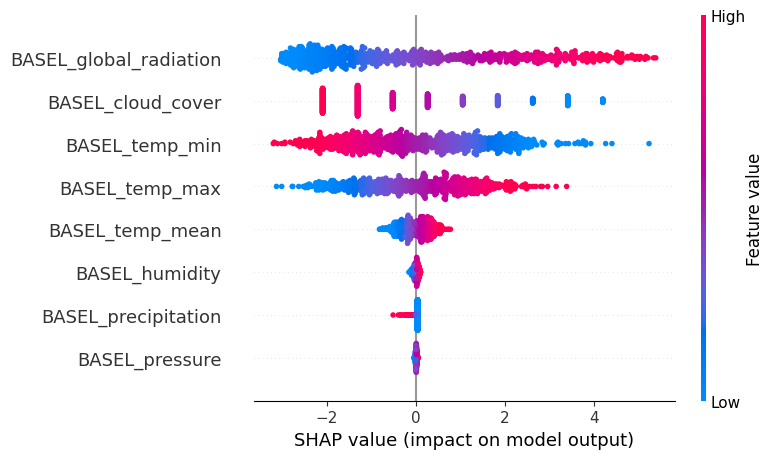

SHAP Dependence Plot for BASEL (first feature):


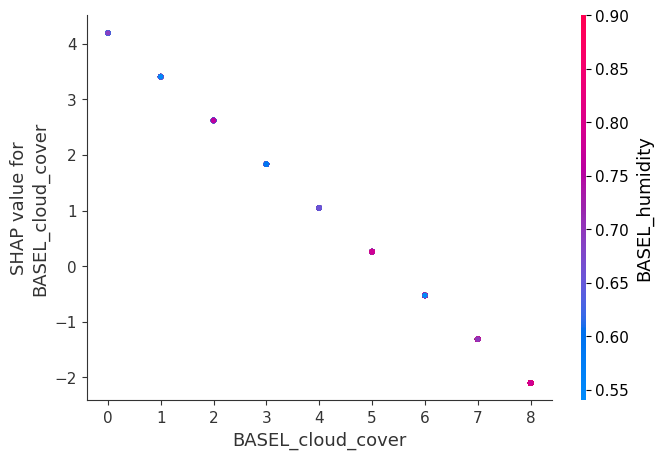





****************************************************************************************************
BUDAPEST Ridge MSE: 1.623
BUDAPEST Ridge R2: 0.919

BUDAPEST Ridge Regression Coefficients:
                     Feature  Coefficient
0       BUDAPEST_cloud_cover    -0.755070
1          BUDAPEST_humidity    -1.520103
2          BUDAPEST_pressure     1.671541
3  BUDAPEST_global_radiation     2.884409
4     BUDAPEST_precipitation    -0.091793
5         BUDAPEST_temp_mean    -0.015101
6          BUDAPEST_temp_max     0.003770

SHAP Summary Plot for BUDAPEST:


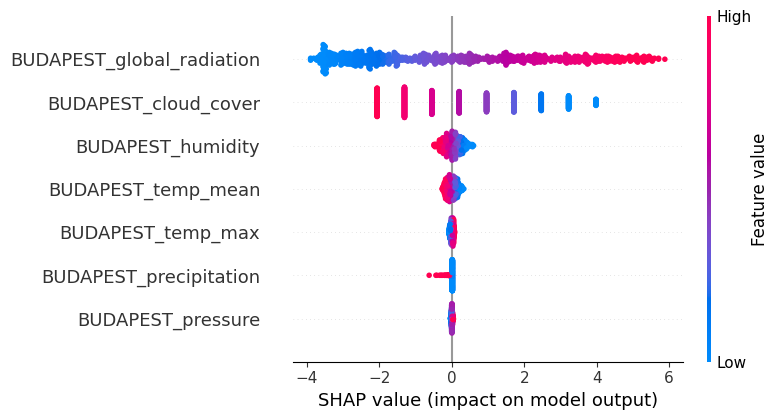

SHAP Dependence Plot for BUDAPEST (first feature):


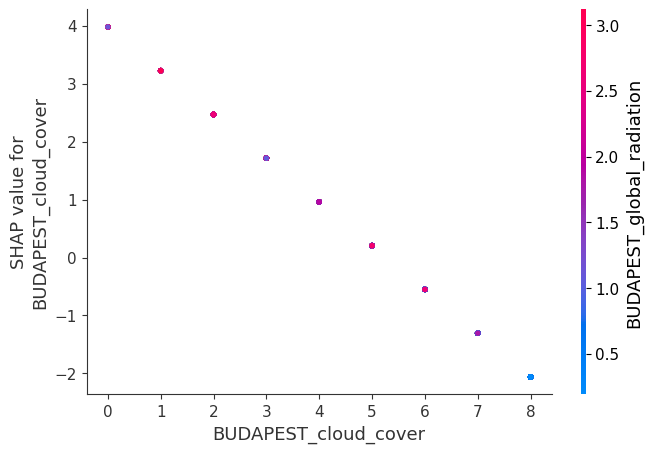





****************************************************************************************************
DEBILT Ridge MSE: 1.281
DEBILT Ridge R2: 0.918

DEBILT Ridge Regression Coefficients:
                   Feature  Coefficient
0       DEBILT_cloud_cover    -0.744986
1        DEBILT_wind_speed     0.178759
2         DEBILT_wind_gust    -0.016626
3          DEBILT_humidity    -0.721566
4          DEBILT_pressure     1.828365
5  DEBILT_global_radiation     3.211921
6     DEBILT_precipitation    -0.242464
7         DEBILT_temp_mean    -0.278039
8          DEBILT_temp_min     0.067542
9          DEBILT_temp_max     0.110480

SHAP Summary Plot for DEBILT:


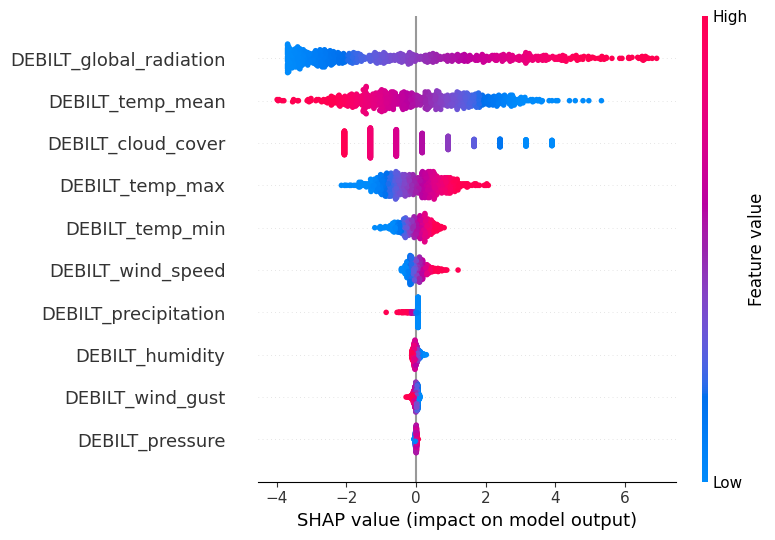

SHAP Dependence Plot for DEBILT (first feature):


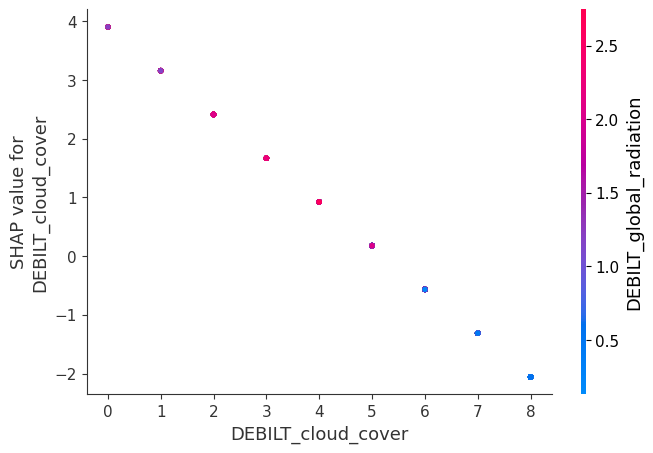





****************************************************************************************************
DRESDEN Ridge MSE: 2.250
DRESDEN Ridge R2: 0.890

DRESDEN Ridge Regression Coefficients:
                    Feature  Coefficient
0       DRESDEN_cloud_cover    -0.839475
1        DRESDEN_wind_speed     0.185621
2         DRESDEN_wind_gust    -0.071572
3          DRESDEN_humidity    -1.613369
4  DRESDEN_global_radiation     2.735546
5     DRESDEN_precipitation     0.164263
6         DRESDEN_temp_mean     0.004952
7          DRESDEN_temp_min    -0.109677
8          DRESDEN_temp_max     0.068294

SHAP Summary Plot for DRESDEN:


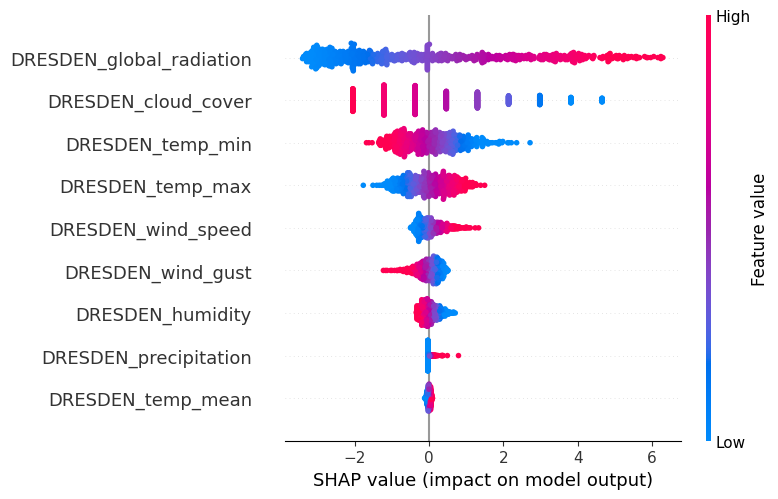

SHAP Dependence Plot for DRESDEN (first feature):


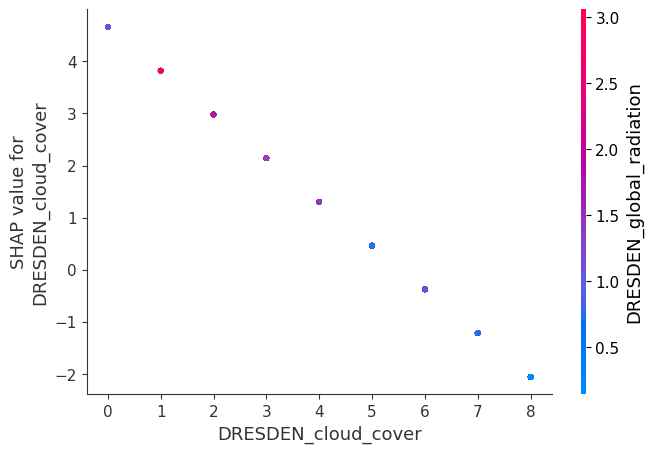





****************************************************************************************************
DUSSELDORF Ridge MSE: 1.388
DUSSELDORF Ridge R2: 0.924

DUSSELDORF Ridge Regression Coefficients:
                       Feature  Coefficient
0       DUSSELDORF_cloud_cover    -0.815787
1        DUSSELDORF_wind_speed     0.285615
2         DUSSELDORF_wind_gust    -0.114852
3          DUSSELDORF_humidity    -1.774249
4          DUSSELDORF_pressure     1.822739
5  DUSSELDORF_global_radiation     3.098877
6     DUSSELDORF_precipitation     0.066239
7         DUSSELDORF_temp_mean    -0.072313
8          DUSSELDORF_temp_min    -0.063028
9          DUSSELDORF_temp_max     0.058736

SHAP Summary Plot for DUSSELDORF:


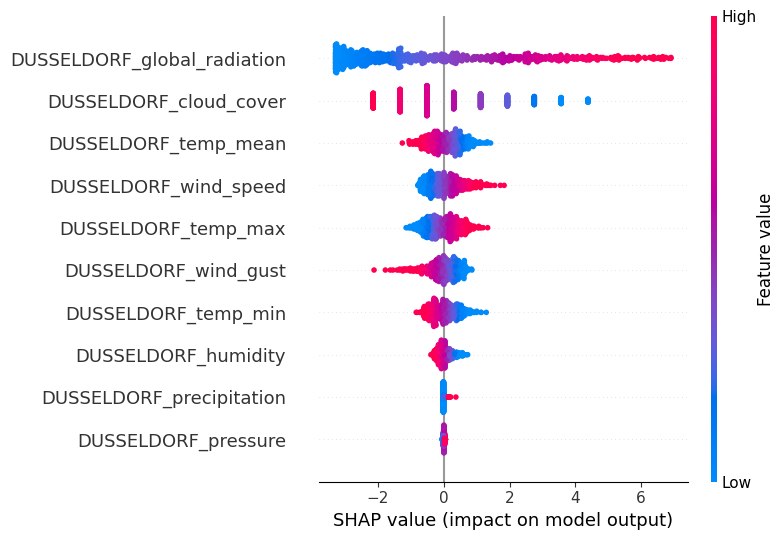

SHAP Dependence Plot for DUSSELDORF (first feature):


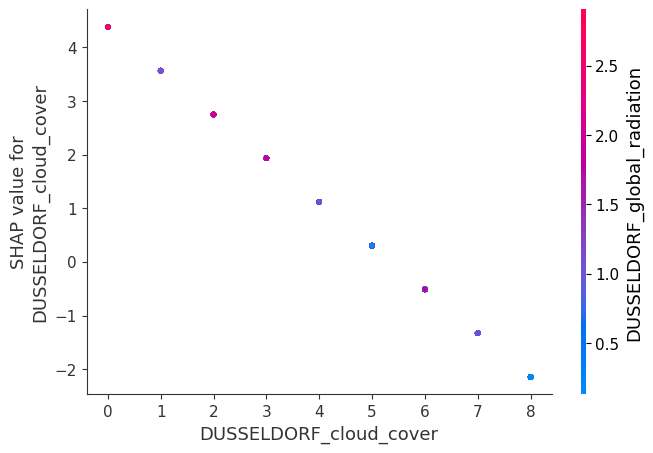





****************************************************************************************************
HEATHROW Ridge MSE: 1.835
HEATHROW Ridge R2: 0.885

HEATHROW Ridge Regression Coefficients:
                     Feature  Coefficient
0       HEATHROW_cloud_cover    -0.739534
1          HEATHROW_humidity    -1.691823
2          HEATHROW_pressure     1.944788
3  HEATHROW_global_radiation     3.298937
4     HEATHROW_precipitation    -0.156448
5         HEATHROW_temp_mean     0.115140
6          HEATHROW_temp_min    -0.105431
7          HEATHROW_temp_max    -0.112601

SHAP Summary Plot for HEATHROW:


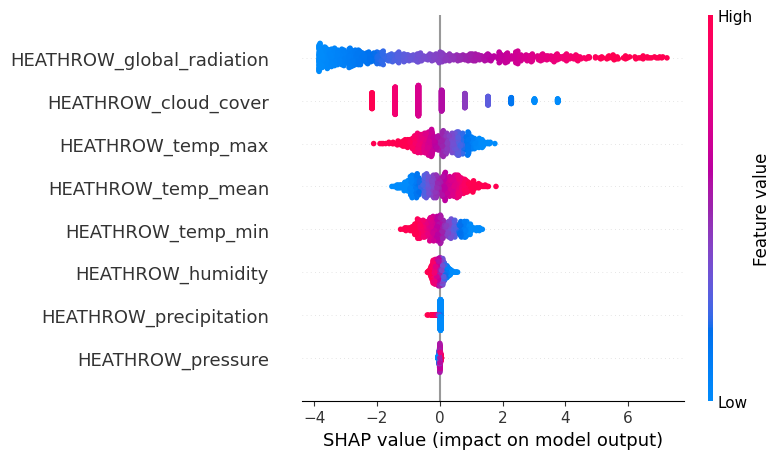

SHAP Dependence Plot for HEATHROW (first feature):


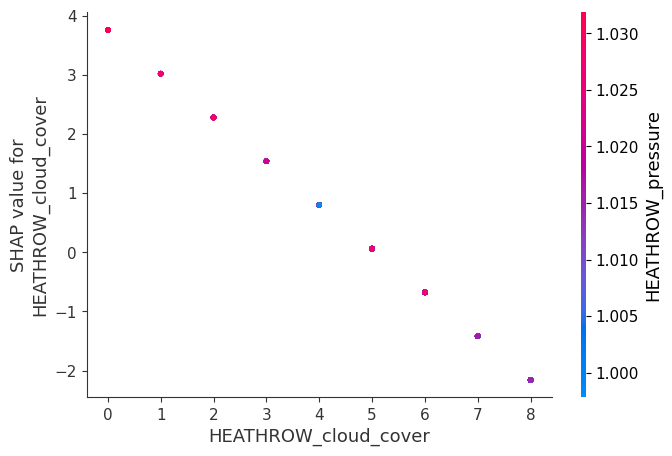





****************************************************************************************************
KASSEL Ridge MSE: 2.734
KASSEL Ridge R2: 0.846

KASSEL Ridge Regression Coefficients:
                   Feature  Coefficient
0        KASSEL_wind_speed     0.418115
1         KASSEL_wind_gust    -0.131159
2          KASSEL_humidity    -5.189284
3          KASSEL_pressure     5.881598
4  KASSEL_global_radiation     3.116530
5     KASSEL_precipitation    -0.231843
6         KASSEL_temp_mean    -0.084196
7          KASSEL_temp_min    -0.344817
8          KASSEL_temp_max     0.310320

SHAP Summary Plot for KASSEL:


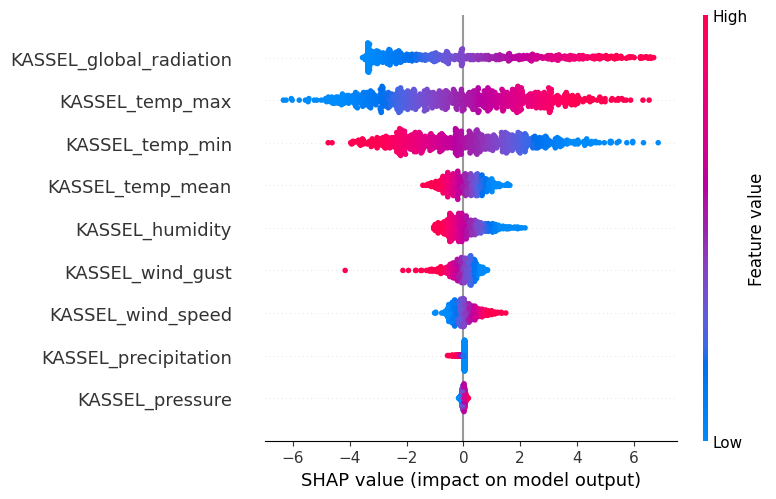

SHAP Dependence Plot for KASSEL (first feature):


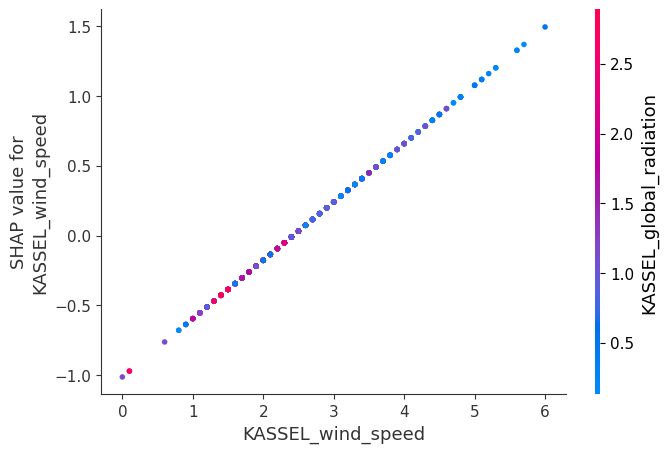





****************************************************************************************************
LJUBLJANA Ridge MSE: 1.342
LJUBLJANA Ridge R2: 0.934

LJUBLJANA Ridge Regression Coefficients:
                      Feature  Coefficient
0       LJUBLJANA_cloud_cover    -0.734007
1        LJUBLJANA_wind_speed     0.059763
2          LJUBLJANA_humidity    -0.034722
3          LJUBLJANA_pressure     1.411746
4  LJUBLJANA_global_radiation     2.838093
5     LJUBLJANA_precipitation     0.092510
6         LJUBLJANA_temp_mean     0.091687
7          LJUBLJANA_temp_min    -0.140200
8          LJUBLJANA_temp_max     0.015195

SHAP Summary Plot for LJUBLJANA:


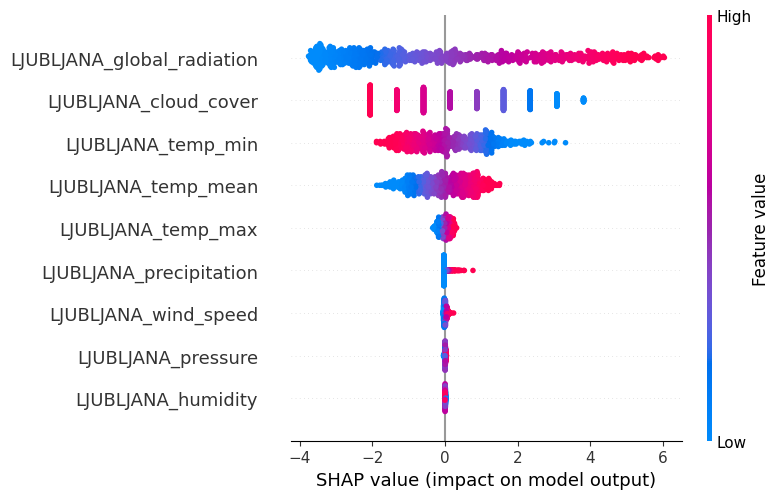

SHAP Dependence Plot for LJUBLJANA (first feature):


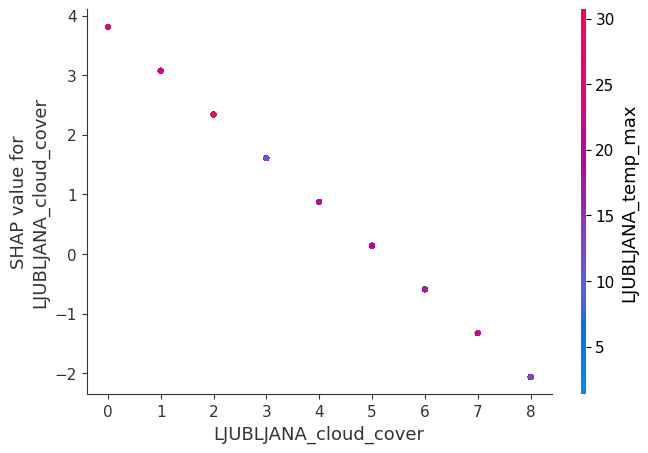





****************************************************************************************************
MAASTRICHT Ridge MSE: 1.365
MAASTRICHT Ridge R2: 0.920

MAASTRICHT Ridge Regression Coefficients:
                       Feature  Coefficient
0       MAASTRICHT_cloud_cover    -0.777474
1        MAASTRICHT_wind_speed     0.096367
2         MAASTRICHT_wind_gust    -0.016191
3          MAASTRICHT_humidity    -2.192109
4          MAASTRICHT_pressure     1.015280
5  MAASTRICHT_global_radiation     2.735389
6     MAASTRICHT_precipitation     0.034286
7         MAASTRICHT_temp_mean    -0.056853
8          MAASTRICHT_temp_min    -0.031165
9          MAASTRICHT_temp_max     0.005407

SHAP Summary Plot for MAASTRICHT:


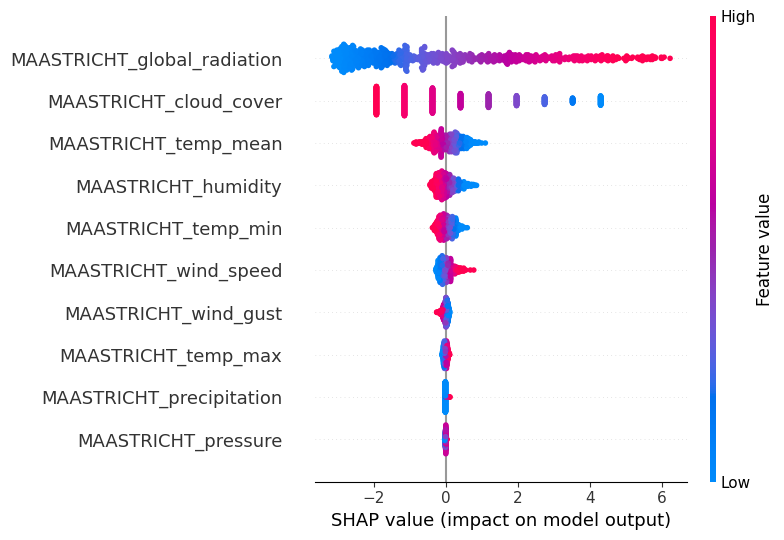

SHAP Dependence Plot for MAASTRICHT (first feature):


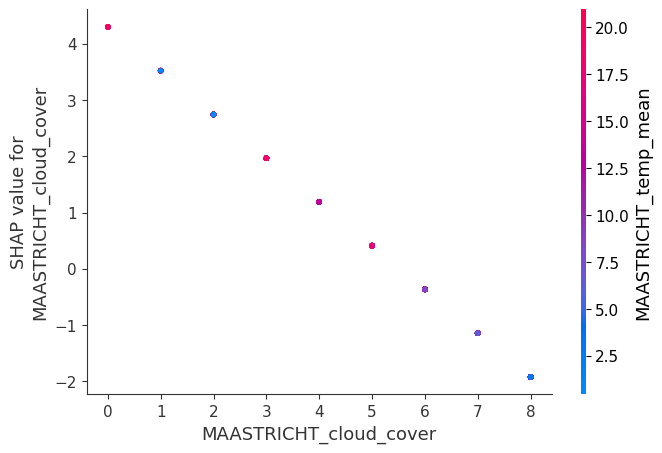





****************************************************************************************************
MUENCHEN Ridge MSE: 1.253
MUENCHEN Ridge R2: 0.943

MUENCHEN Ridge Regression Coefficients:
                     Feature  Coefficient
0       MUENCHEN_cloud_cover    -0.707607
1        MUENCHEN_wind_speed     0.128534
2         MUENCHEN_wind_gust    -0.069825
3          MUENCHEN_humidity    -1.169290
4          MUENCHEN_pressure     1.643184
5  MUENCHEN_global_radiation     2.730891
6     MUENCHEN_precipitation    -0.076423
7         MUENCHEN_temp_mean    -0.080034
8          MUENCHEN_temp_min    -0.204944
9          MUENCHEN_temp_max     0.214846

SHAP Summary Plot for MUENCHEN:


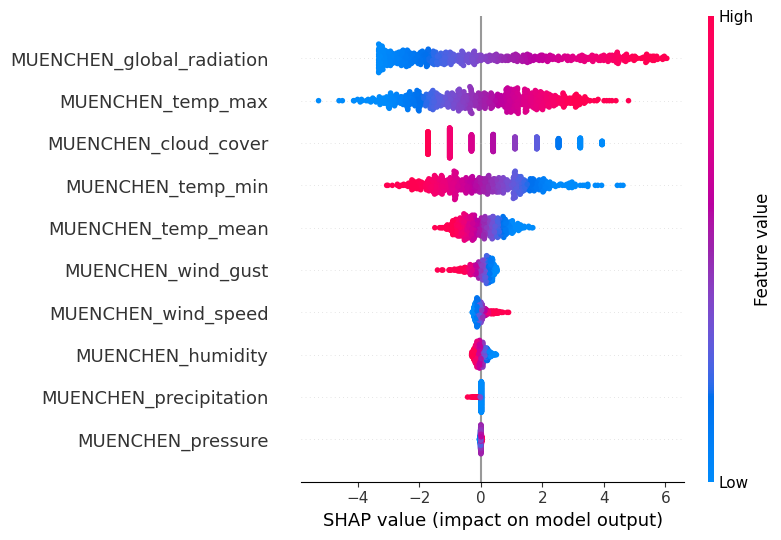

SHAP Dependence Plot for MUENCHEN (first feature):


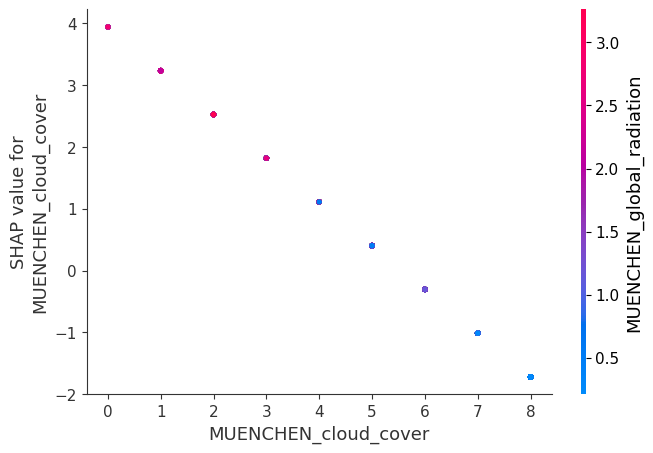





****************************************************************************************************
OSLO Ridge MSE: 4.999
OSLO Ridge R2: 0.783

OSLO Ridge Regression Coefficients:
                 Feature  Coefficient
0       OSLO_cloud_cover    -0.927792
1        OSLO_wind_speed    -0.065901
2         OSLO_wind_gust     0.040189
3          OSLO_humidity     0.439639
4          OSLO_pressure    -0.943575
5  OSLO_global_radiation     2.754252
6     OSLO_precipitation     0.070392
7         OSLO_temp_mean     0.279466
8          OSLO_temp_min    -0.216518
9          OSLO_temp_max    -0.065672

SHAP Summary Plot for OSLO:


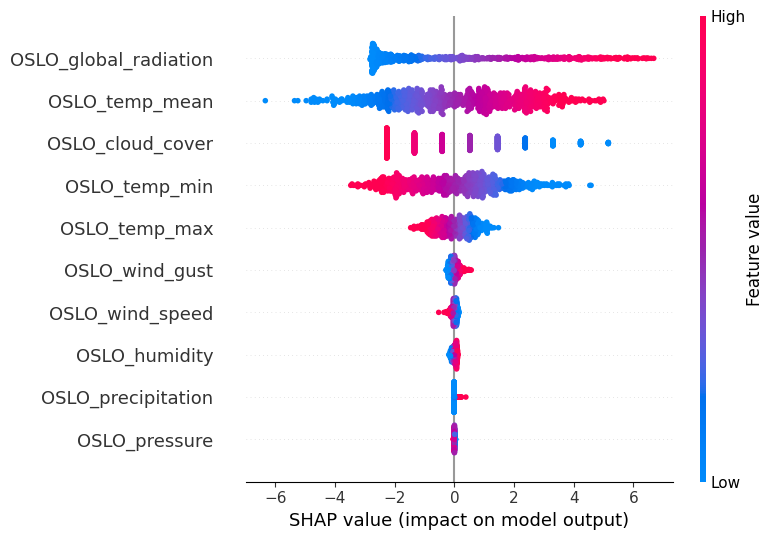

SHAP Dependence Plot for OSLO (first feature):


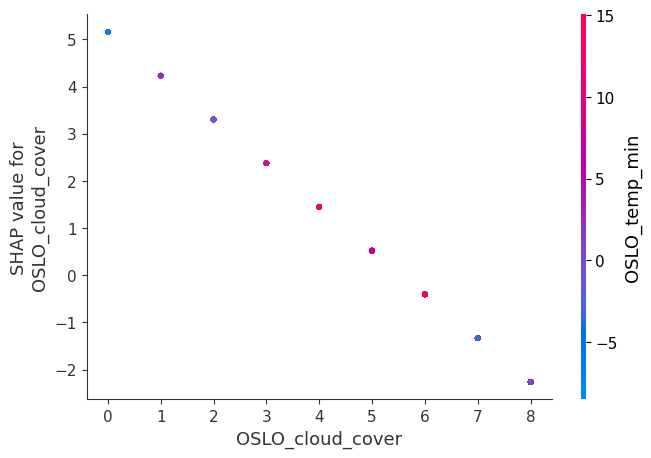





****************************************************************************************************
ROMA Ridge MSE: 1.607
ROMA Ridge R2: 0.900

ROMA Ridge Regression Coefficients:
                 Feature  Coefficient
0       ROMA_cloud_cover    -0.799596
1          ROMA_humidity     0.147846
2          ROMA_pressure     0.958728
3  ROMA_global_radiation     3.062621
4         ROMA_temp_mean     0.023661
5          ROMA_temp_min    -0.014684
6          ROMA_temp_max    -0.053888

SHAP Summary Plot for ROMA:


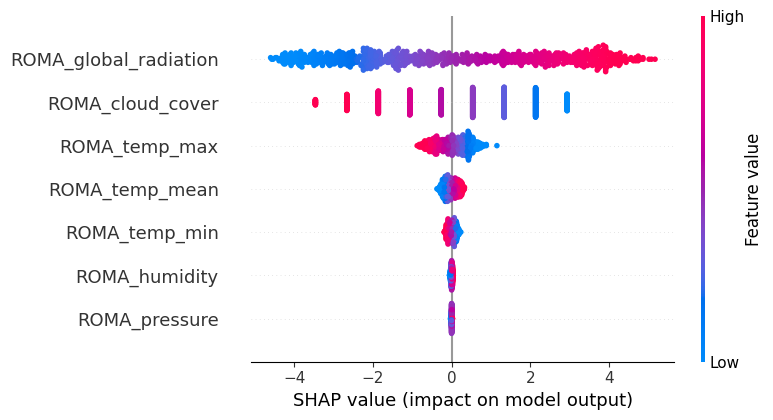

SHAP Dependence Plot for ROMA (first feature):


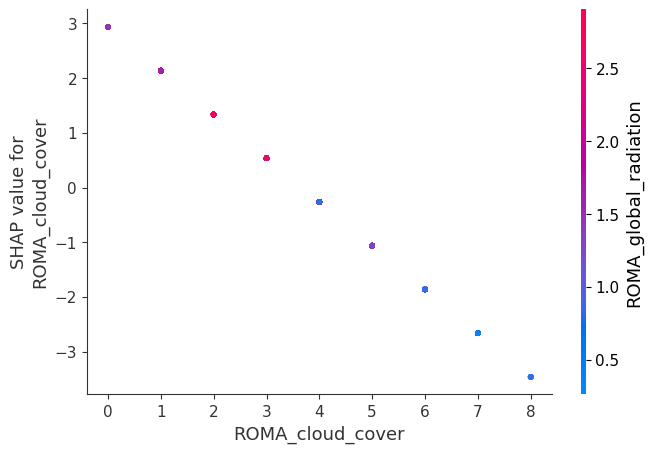





****************************************************************************************************
SONNBLICK Ridge MSE: 3.845
SONNBLICK Ridge R2: 0.813

SONNBLICK Ridge Regression Coefficients:
                      Feature  Coefficient
0       SONNBLICK_cloud_cover    -1.107845
1          SONNBLICK_humidity    -2.507312
2  SONNBLICK_global_radiation     1.830745
3     SONNBLICK_precipitation    -0.271260
4         SONNBLICK_temp_mean     0.099118
5          SONNBLICK_temp_min    -0.118308
6          SONNBLICK_temp_max     0.072053

SHAP Summary Plot for SONNBLICK:


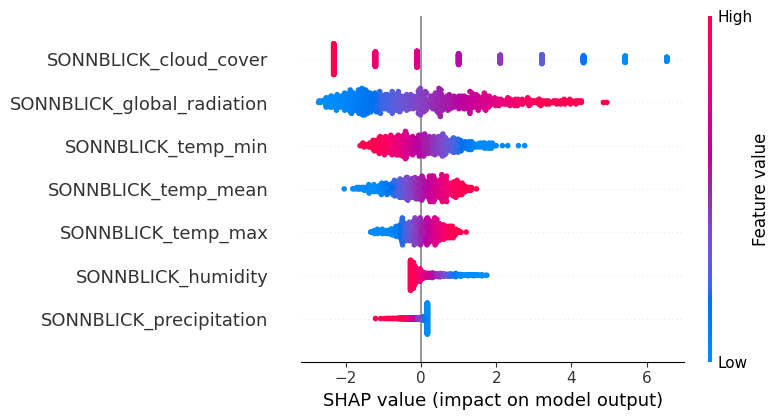

SHAP Dependence Plot for SONNBLICK (first feature):


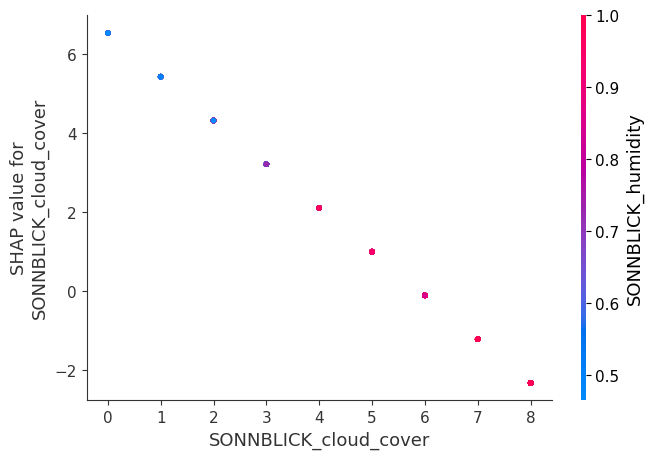





****************************************************************************************************
STOCKHOLM Ridge MSE: 5.532
STOCKHOLM Ridge R2: 0.770

STOCKHOLM Ridge Regression Coefficients:
                   Feature  Coefficient
0    STOCKHOLM_cloud_cover    -1.146147
1       STOCKHOLM_pressure     3.607740
2  STOCKHOLM_precipitation    -0.663290
3      STOCKHOLM_temp_mean     0.201071
4       STOCKHOLM_temp_min    -0.565227
5       STOCKHOLM_temp_max     0.491352

SHAP Summary Plot for STOCKHOLM:


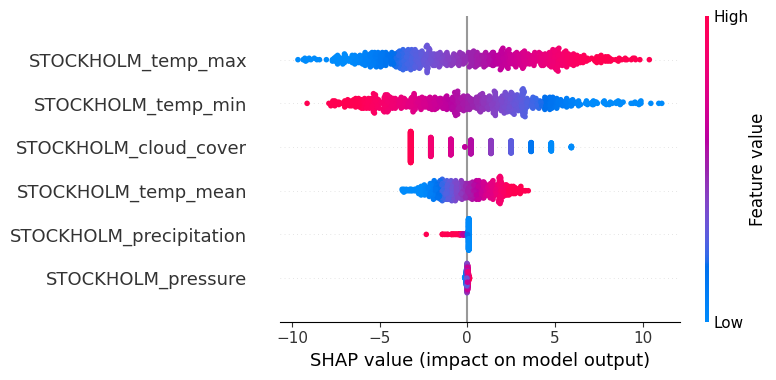

SHAP Dependence Plot for STOCKHOLM (first feature):


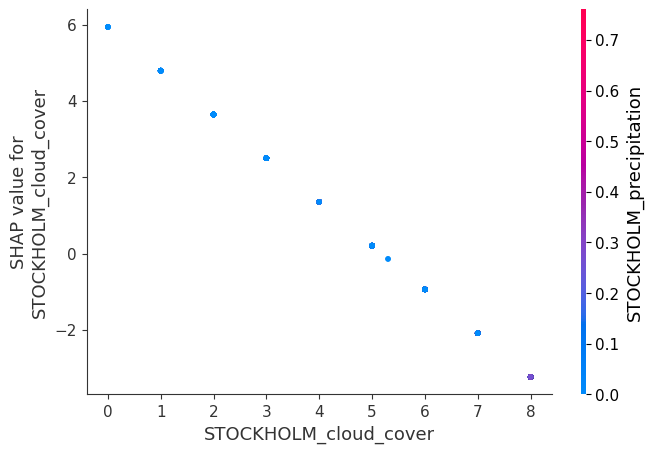





****************************************************************************************************


In [30]:
# Get a list of all city names by identifying columns that end with '_sunshine'
cities = [col.rsplit('_', 1)[0] for col in data.columns if col.endswith('_sunshine')]

# Loop through each city and apply Ridge regression model
for city in cities:
    # Select feature columns and target column for the city
    feature_columns = [col for col in data.columns if col.startswith(city) and not col.endswith('_sunshine')]
    target_column = f'{city}_sunshine'
    
    X = data[feature_columns]
    y = data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Ridge Regression model with regularization
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results for each city
    print(f"{city} Ridge MSE: {mse:.3f}")
    print(f"{city} Ridge R2: {r2:.3f}")
    
    # Print coefficients to see how Ridge handled the multicollinearity for each city
    coefficients = pd.DataFrame({
        "Feature": feature_columns,
        "Coefficient": ridge_model.coef_
    })
    print(f"\n{city} Ridge Regression Coefficients:")
    print(f"{coefficients}\n")
    
    # SHAP Integration
    # Create SHAP explainer for Ridge model
    explainer = shap.Explainer(ridge_model, X_train)
    
    # Calculate SHAP values on the test set
    shap_values = explainer(X_test)

    # Visualize SHAP values for feature importance (summary plot)
    print(f"SHAP Summary Plot for {city}:")
    shap.summary_plot(shap_values.values, X_test, feature_names=feature_columns)

    # Visualize SHAP dependence for specific features
    print(f"SHAP Dependence Plot for {city} (first feature):")
    shap.dependence_plot(feature_columns[0], shap_values.values, X_test)

    print("\n\n\n")
    print("*" * 100)


### <font color='blue'> Use SHAP with Lasso Regression (again: Lasso results in less predictive power in our setting, but gives us better chance to explain, as it sets "unimportant" features to a 0 value)

In [31]:
alpha = 1.0

BASEL Lasso MSE: 3.423
BASEL Lasso R2: 0.822

BASEL Lasso Regression Coefficients:
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.997343
1          BASEL_humidity    -0.000000
2          BASEL_pressure     0.000000
3  BASEL_global_radiation     0.000000
4     BASEL_precipitation    -0.000000
5         BASEL_temp_mean     0.000000
6          BASEL_temp_min    -0.193678
7          BASEL_temp_max     0.324286

SHAP Summary Plot for BASEL:


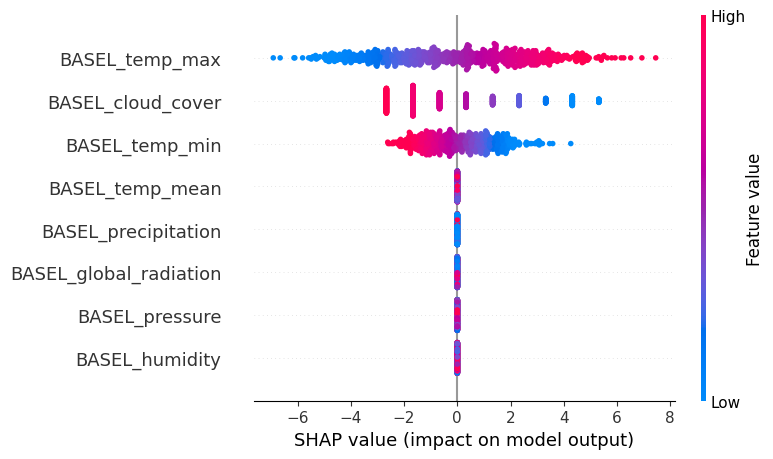

SHAP Dependence Plot for BASEL (first feature):


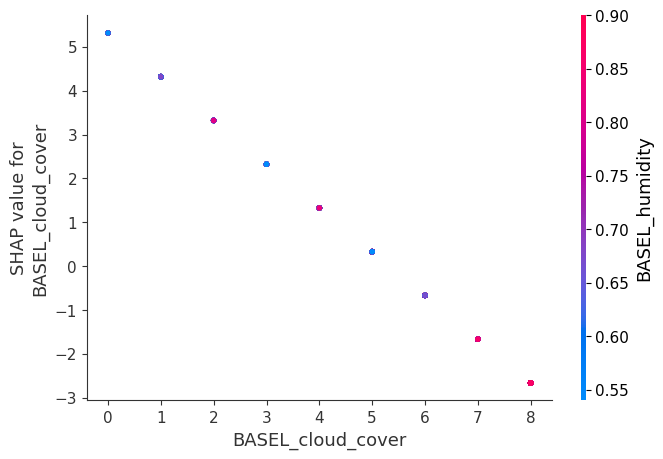





****************************************************************************************************
BUDAPEST Lasso MSE: 4.113
BUDAPEST Lasso R2: 0.794

BUDAPEST Lasso Regression Coefficients:
                     Feature  Coefficient
0       BUDAPEST_cloud_cover    -1.041011
1          BUDAPEST_humidity    -0.000000
2          BUDAPEST_pressure     0.000000
3  BUDAPEST_global_radiation     0.000000
4     BUDAPEST_precipitation    -0.000000
5         BUDAPEST_temp_mean     0.000000
6          BUDAPEST_temp_max     0.193265

SHAP Summary Plot for BUDAPEST:


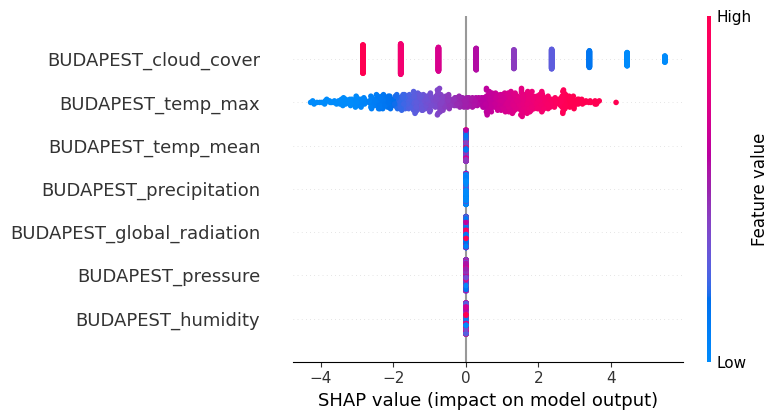

SHAP Dependence Plot for BUDAPEST (first feature):


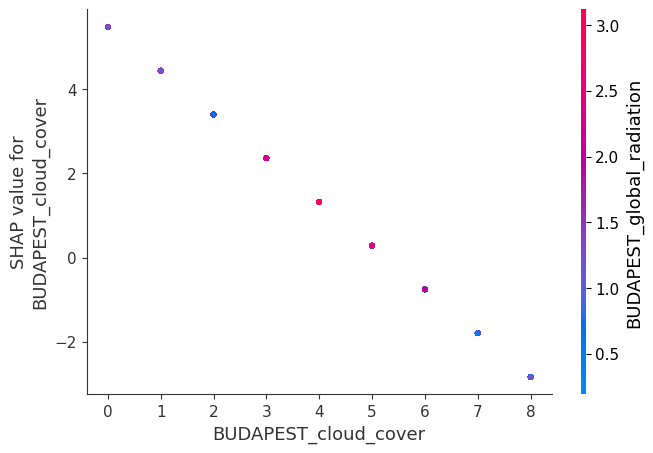





****************************************************************************************************
DEBILT Lasso MSE: 3.784
DEBILT Lasso R2: 0.757

DEBILT Lasso Regression Coefficients:
                   Feature  Coefficient
0       DEBILT_cloud_cover    -1.073790
1        DEBILT_wind_speed    -0.000000
2         DEBILT_wind_gust     0.000000
3          DEBILT_humidity    -0.000000
4          DEBILT_pressure     0.000000
5  DEBILT_global_radiation     0.080392
6     DEBILT_precipitation    -0.000000
7         DEBILT_temp_mean     0.000000
8          DEBILT_temp_min    -0.028363
9          DEBILT_temp_max     0.166859

SHAP Summary Plot for DEBILT:


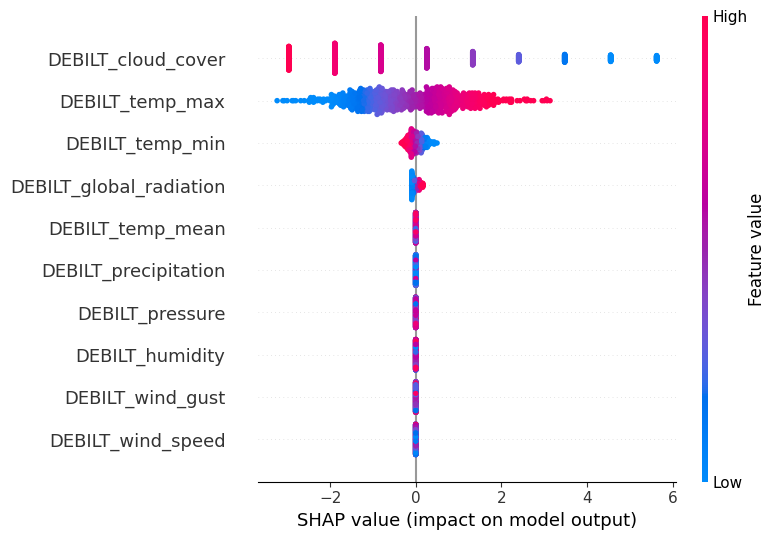

SHAP Dependence Plot for DEBILT (first feature):


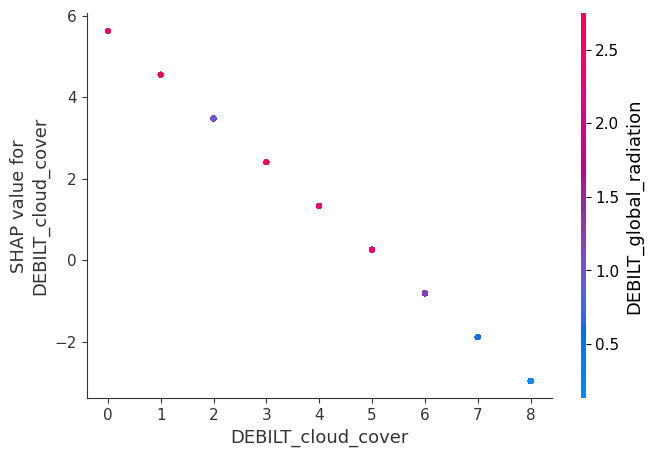





****************************************************************************************************
DRESDEN Lasso MSE: 4.817
DRESDEN Lasso R2: 0.764

DRESDEN Lasso Regression Coefficients:
                    Feature  Coefficient
0       DRESDEN_cloud_cover    -1.073518
1        DRESDEN_wind_speed    -0.000000
2         DRESDEN_wind_gust    -0.000000
3          DRESDEN_humidity    -0.000000
4  DRESDEN_global_radiation     0.000000
5     DRESDEN_precipitation    -0.000000
6         DRESDEN_temp_mean     0.000000
7          DRESDEN_temp_min    -0.114879
8          DRESDEN_temp_max     0.266441

SHAP Summary Plot for DRESDEN:


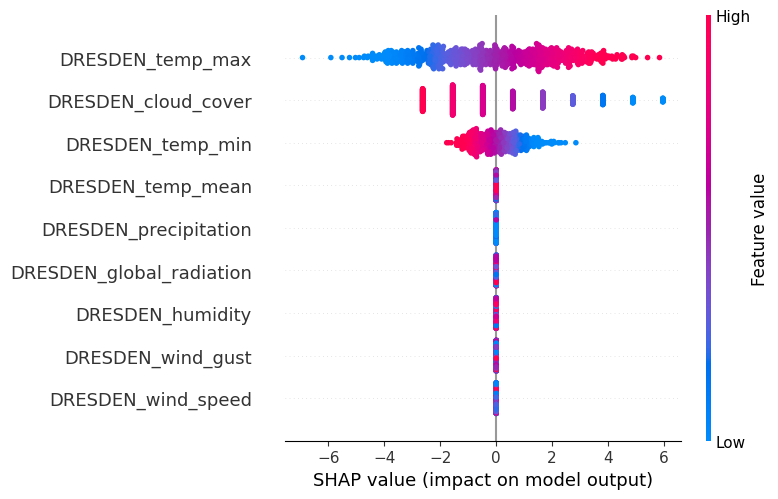

SHAP Dependence Plot for DRESDEN (first feature):


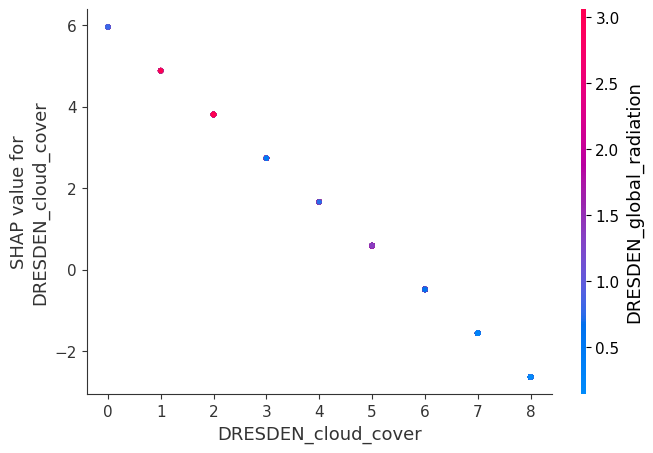





****************************************************************************************************
DUSSELDORF Lasso MSE: 3.510
DUSSELDORF Lasso R2: 0.808

DUSSELDORF Lasso Regression Coefficients:
                       Feature  Coefficient
0       DUSSELDORF_cloud_cover    -1.092366
1        DUSSELDORF_wind_speed    -0.000000
2         DUSSELDORF_wind_gust    -0.000000
3          DUSSELDORF_humidity    -0.000000
4          DUSSELDORF_pressure     0.000000
5  DUSSELDORF_global_radiation     0.000000
6     DUSSELDORF_precipitation    -0.000000
7         DUSSELDORF_temp_mean     0.000000
8          DUSSELDORF_temp_min    -0.134816
9          DUSSELDORF_temp_max     0.279612

SHAP Summary Plot for DUSSELDORF:


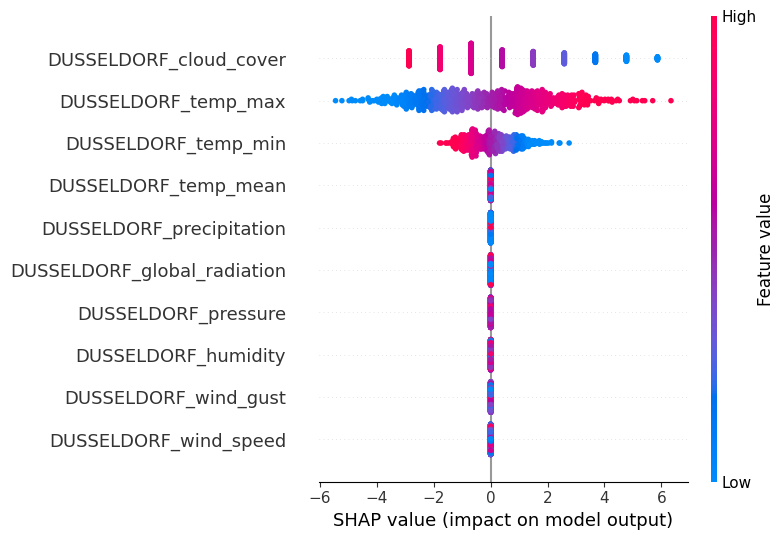

SHAP Dependence Plot for DUSSELDORF (first feature):


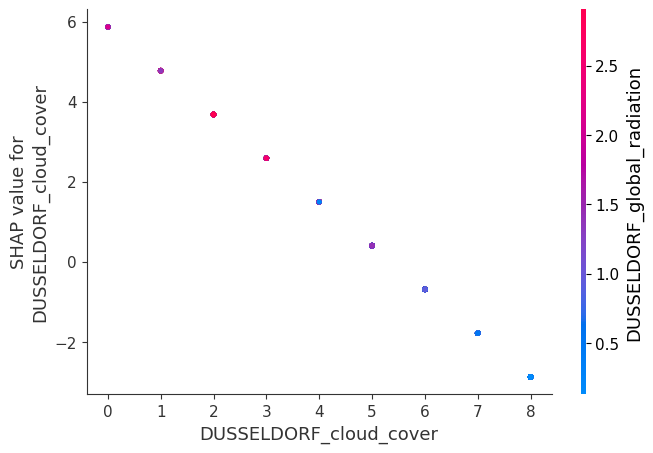





****************************************************************************************************
HEATHROW Lasso MSE: 4.228
HEATHROW Lasso R2: 0.735

HEATHROW Lasso Regression Coefficients:
                     Feature  Coefficient
0       HEATHROW_cloud_cover    -0.952691
1          HEATHROW_humidity    -0.000000
2          HEATHROW_pressure     0.000000
3  HEATHROW_global_radiation     0.898295
4     HEATHROW_precipitation    -0.000000
5         HEATHROW_temp_mean     0.000000
6          HEATHROW_temp_min    -0.000000
7          HEATHROW_temp_max     0.122023

SHAP Summary Plot for HEATHROW:


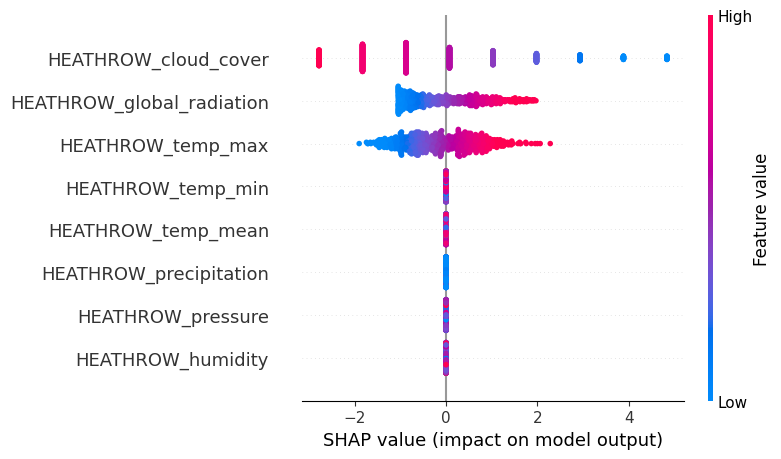

SHAP Dependence Plot for HEATHROW (first feature):


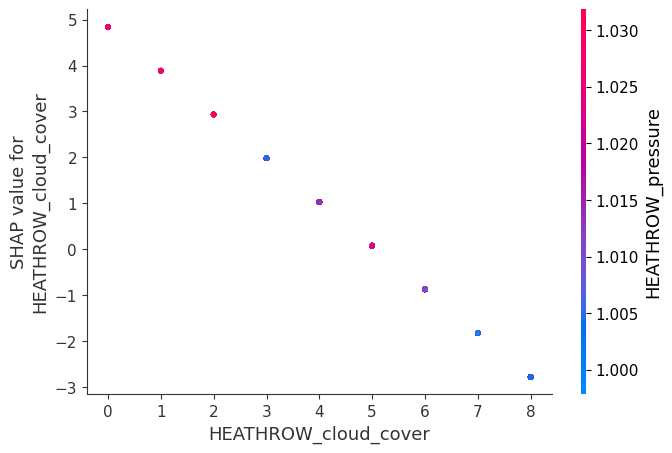





****************************************************************************************************
KASSEL Lasso MSE: 6.145
KASSEL Lasso R2: 0.653

KASSEL Lasso Regression Coefficients:
                   Feature  Coefficient
0        KASSEL_wind_speed     0.000000
1         KASSEL_wind_gust    -0.000000
2          KASSEL_humidity    -0.000000
3          KASSEL_pressure     0.000000
4  KASSEL_global_radiation     0.000000
5     KASSEL_precipitation    -0.000000
6         KASSEL_temp_mean     0.000000
7          KASSEL_temp_min    -0.628079
8          KASSEL_temp_max     0.697753

SHAP Summary Plot for KASSEL:


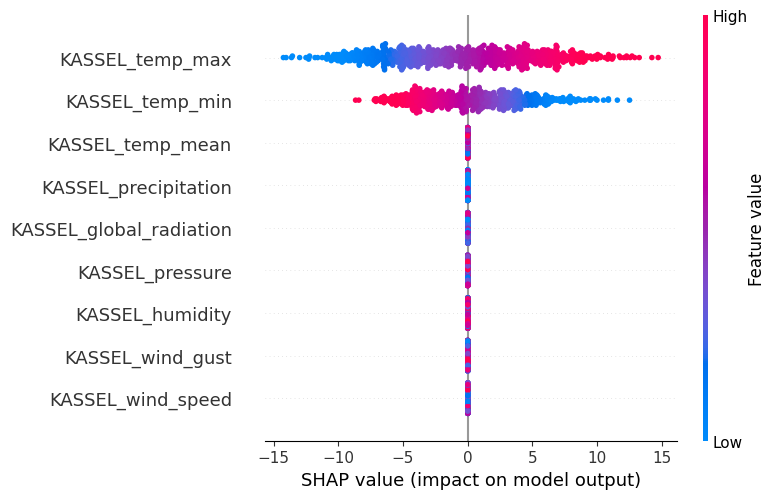

SHAP Dependence Plot for KASSEL (first feature):


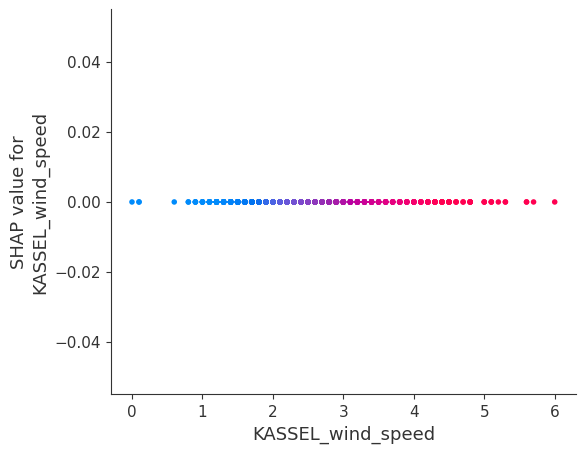





****************************************************************************************************
LJUBLJANA Lasso MSE: 3.035
LJUBLJANA Lasso R2: 0.852

LJUBLJANA Lasso Regression Coefficients:
                      Feature  Coefficient
0       LJUBLJANA_cloud_cover    -0.995765
1        LJUBLJANA_wind_speed     0.000000
2          LJUBLJANA_humidity    -0.000000
3          LJUBLJANA_pressure     0.000000
4  LJUBLJANA_global_radiation     0.000000
5     LJUBLJANA_precipitation    -0.000000
6         LJUBLJANA_temp_mean     0.000000
7          LJUBLJANA_temp_min    -0.128104
8          LJUBLJANA_temp_max     0.283553

SHAP Summary Plot for LJUBLJANA:


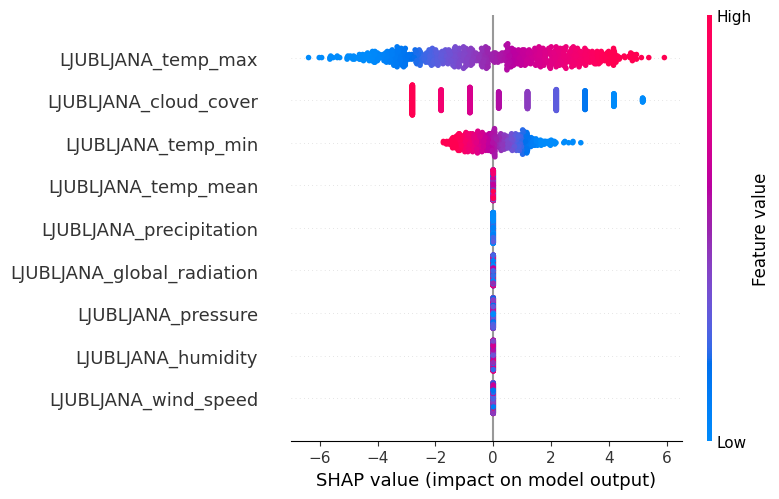

SHAP Dependence Plot for LJUBLJANA (first feature):


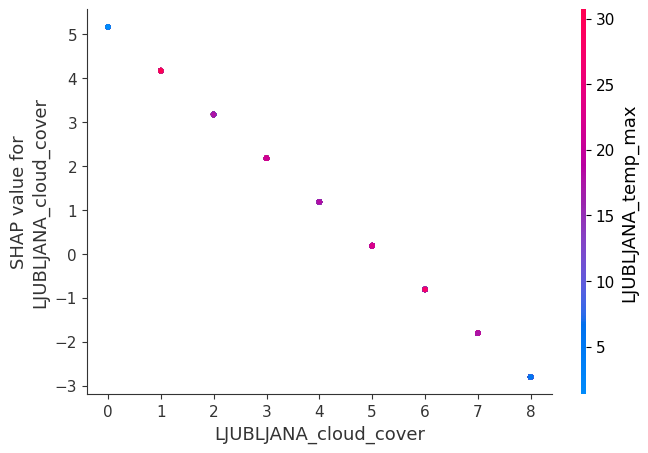





****************************************************************************************************
MAASTRICHT Lasso MSE: 3.565
MAASTRICHT Lasso R2: 0.792

MAASTRICHT Lasso Regression Coefficients:
                       Feature  Coefficient
0       MAASTRICHT_cloud_cover    -1.067691
1        MAASTRICHT_wind_speed    -0.000000
2         MAASTRICHT_wind_gust    -0.000000
3          MAASTRICHT_humidity    -0.000000
4          MAASTRICHT_pressure     0.000000
5  MAASTRICHT_global_radiation     0.000000
6     MAASTRICHT_precipitation    -0.000000
7         MAASTRICHT_temp_mean     0.000000
8          MAASTRICHT_temp_min    -0.014210
9          MAASTRICHT_temp_max     0.153895

SHAP Summary Plot for MAASTRICHT:


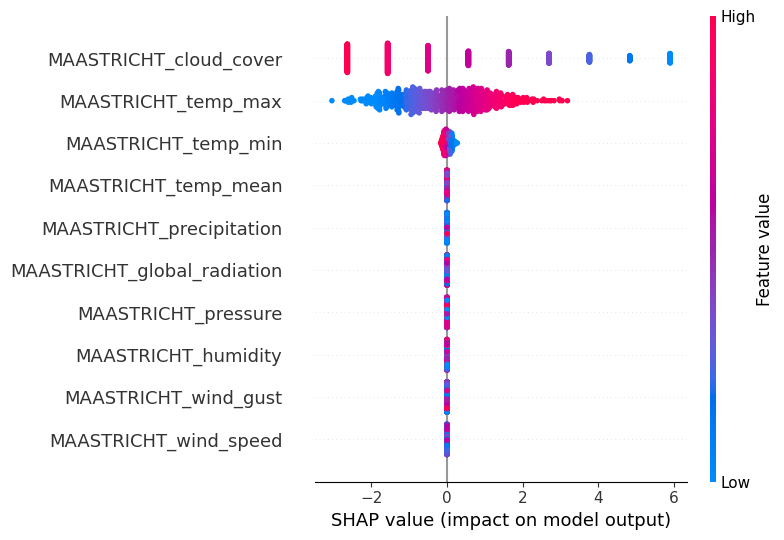

SHAP Dependence Plot for MAASTRICHT (first feature):


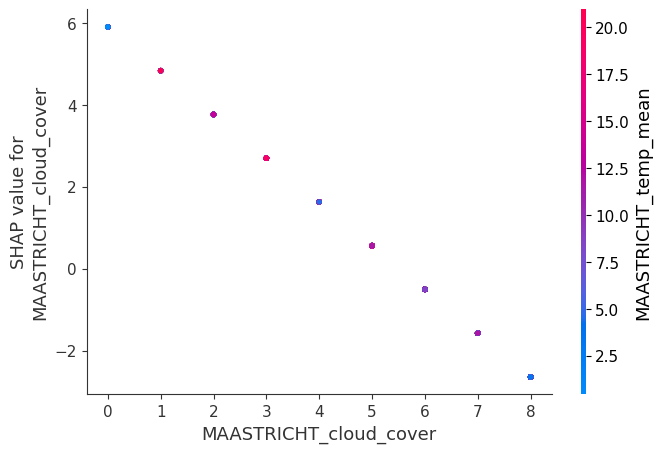





****************************************************************************************************
MUENCHEN Lasso MSE: 3.842
MUENCHEN Lasso R2: 0.825

MUENCHEN Lasso Regression Coefficients:
                     Feature  Coefficient
0       MUENCHEN_cloud_cover    -1.058734
1        MUENCHEN_wind_speed    -0.000000
2         MUENCHEN_wind_gust    -0.000000
3          MUENCHEN_humidity    -0.000000
4          MUENCHEN_pressure     0.000000
5  MUENCHEN_global_radiation     0.000000
6     MUENCHEN_precipitation    -0.000000
7         MUENCHEN_temp_mean     0.000000
8          MUENCHEN_temp_min    -0.164658
9          MUENCHEN_temp_max     0.308057

SHAP Summary Plot for MUENCHEN:


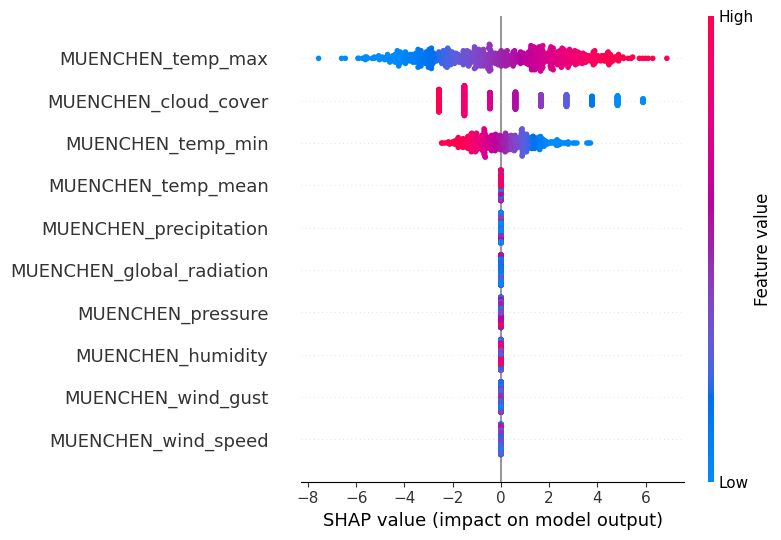

SHAP Dependence Plot for MUENCHEN (first feature):


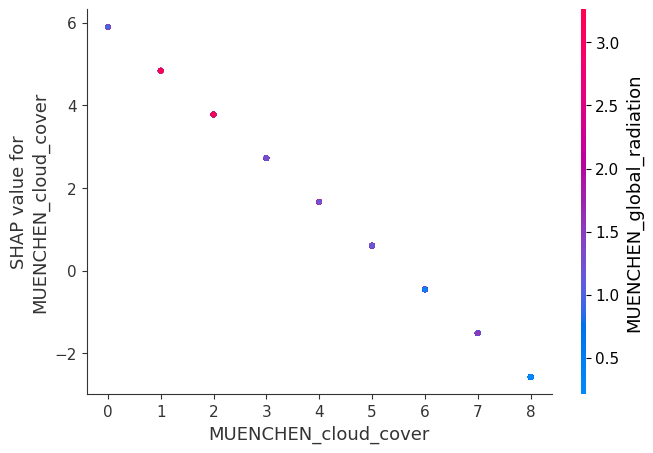





****************************************************************************************************
OSLO Lasso MSE: 7.626
OSLO Lasso R2: 0.668

OSLO Lasso Regression Coefficients:
                 Feature  Coefficient
0       OSLO_cloud_cover    -1.017094
1        OSLO_wind_speed     0.000000
2         OSLO_wind_gust     0.000000
3          OSLO_humidity    -0.000000
4          OSLO_pressure     0.000000
5  OSLO_global_radiation     0.000000
6     OSLO_precipitation    -0.000000
7         OSLO_temp_mean     0.000000
8          OSLO_temp_min    -0.167960
9          OSLO_temp_max     0.350586

SHAP Summary Plot for OSLO:


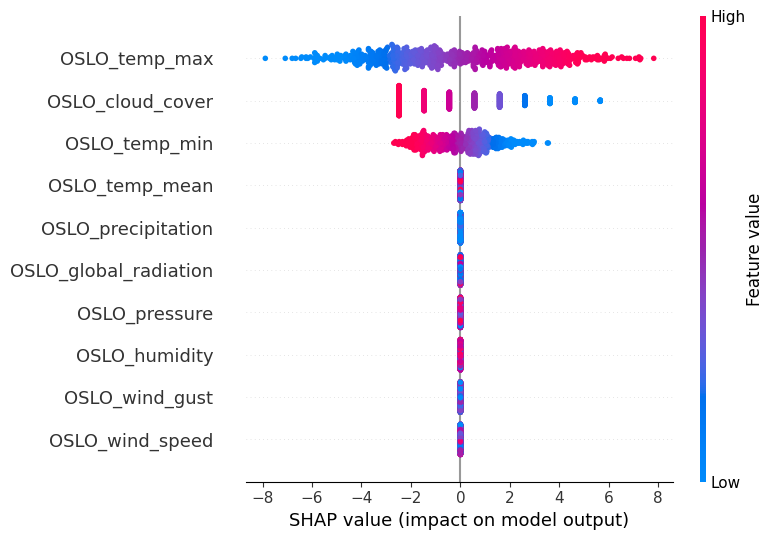

SHAP Dependence Plot for OSLO (first feature):


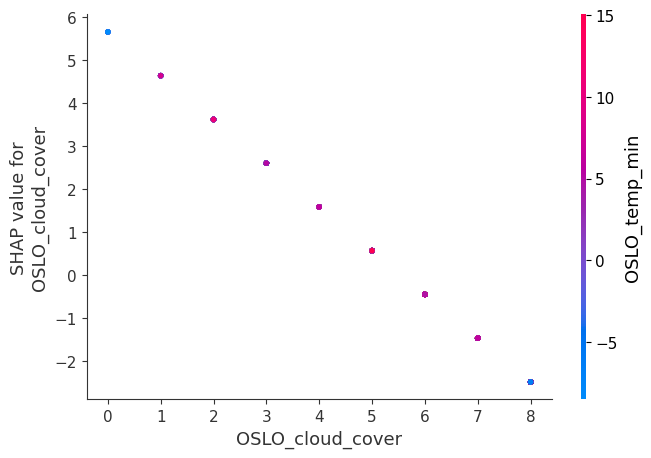





****************************************************************************************************
ROMA Lasso MSE: 4.004
ROMA Lasso R2: 0.751

ROMA Lasso Regression Coefficients:
                 Feature  Coefficient
0       ROMA_cloud_cover    -1.037767
1          ROMA_humidity    -0.000000
2          ROMA_pressure    -0.000000
3  ROMA_global_radiation     0.000000
4         ROMA_temp_mean     0.000000
5          ROMA_temp_min    -0.000000
6          ROMA_temp_max     0.171815

SHAP Summary Plot for ROMA:


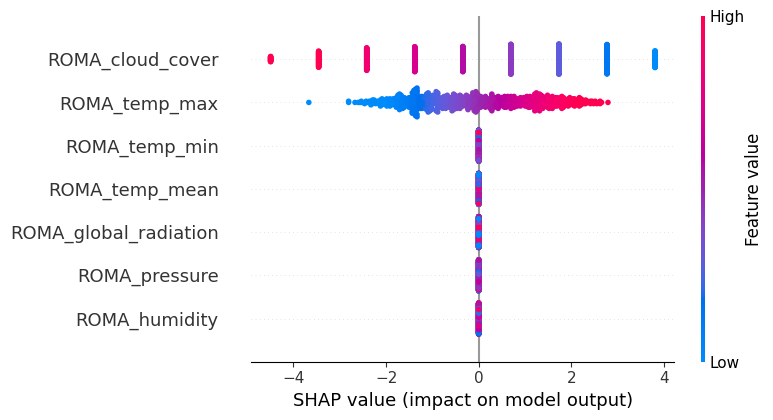

SHAP Dependence Plot for ROMA (first feature):


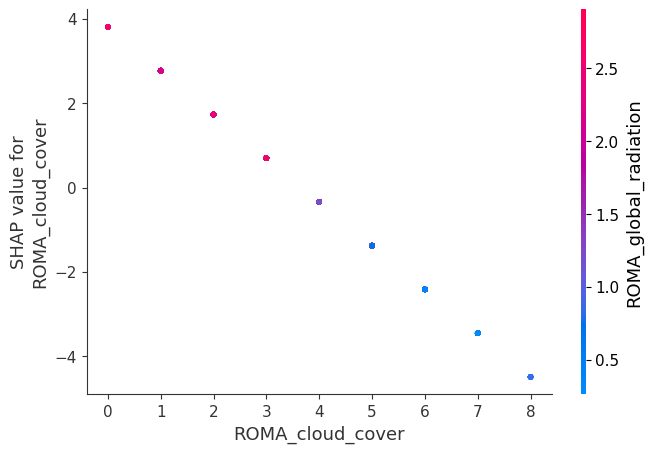





****************************************************************************************************
SONNBLICK Lasso MSE: 5.071
SONNBLICK Lasso R2: 0.753

SONNBLICK Lasso Regression Coefficients:
                      Feature  Coefficient
0       SONNBLICK_cloud_cover    -1.256484
1          SONNBLICK_humidity    -0.000000
2  SONNBLICK_global_radiation     0.347114
3     SONNBLICK_precipitation    -0.000000
4         SONNBLICK_temp_mean     0.000000
5          SONNBLICK_temp_min     0.000000
6          SONNBLICK_temp_max     0.121288

SHAP Summary Plot for SONNBLICK:


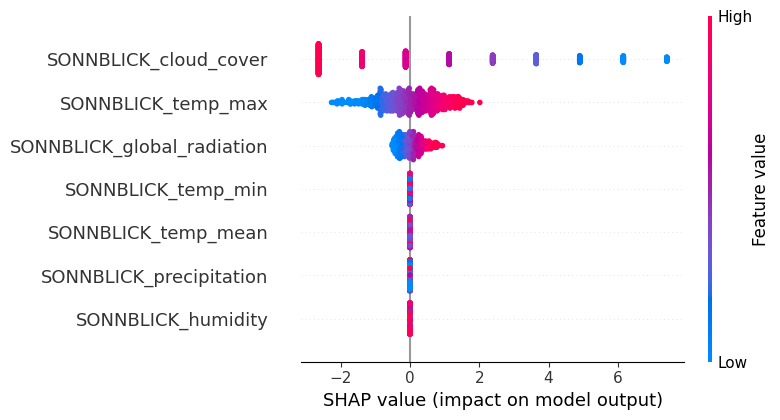

SHAP Dependence Plot for SONNBLICK (first feature):


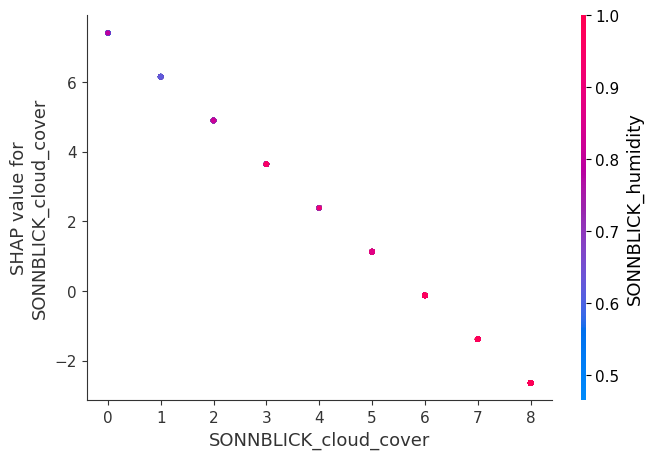





****************************************************************************************************
STOCKHOLM Lasso MSE: 6.062
STOCKHOLM Lasso R2: 0.748

STOCKHOLM Lasso Regression Coefficients:
                   Feature  Coefficient
0    STOCKHOLM_cloud_cover    -1.132106
1       STOCKHOLM_pressure     0.000000
2  STOCKHOLM_precipitation    -0.000000
3      STOCKHOLM_temp_mean     0.000000
4       STOCKHOLM_temp_min    -0.203644
5       STOCKHOLM_temp_max     0.376905

SHAP Summary Plot for STOCKHOLM:


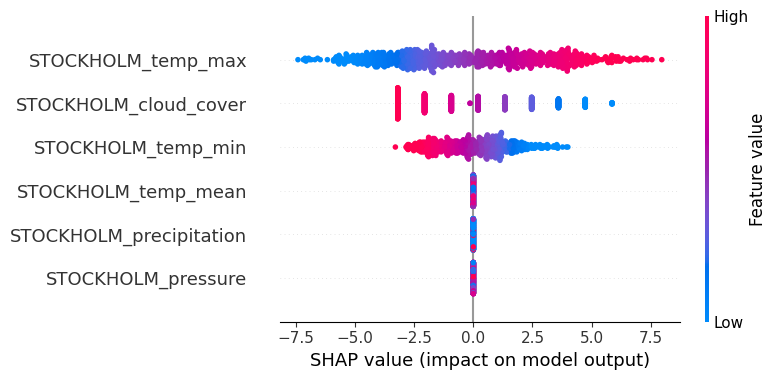

SHAP Dependence Plot for STOCKHOLM (first feature):


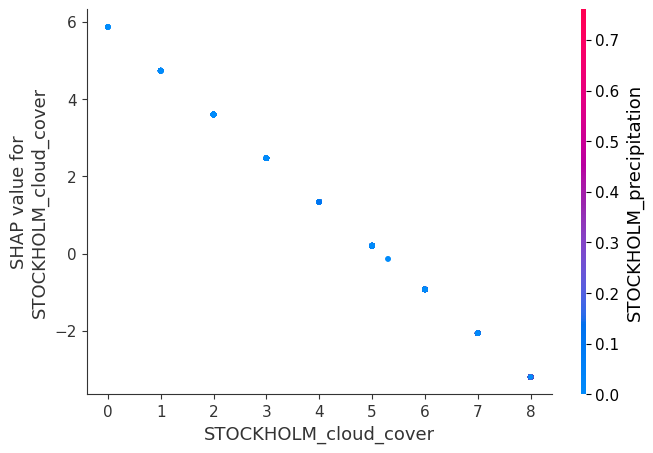





****************************************************************************************************


In [32]:
# Get a list of all city names by identifying columns that end with '_sunshine'
cities = [col.rsplit('_', 1)[0] for col in data.columns if col.endswith('_sunshine')]

# Loop through each city and apply Lasso regression model
for city in cities:
    # Select feature columns and target column for the city
    feature_columns = [col for col in data.columns if col.startswith(city) and not col.endswith('_sunshine')]
    target_column = f'{city}_sunshine'
    
    X = data[feature_columns]
    y = data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Lasso Regression model with regularization
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results for each city
    print(f"{city} Lasso MSE: {mse:.3f}")
    print(f"{city} Lasso R2: {r2:.3f}")
    
    # Print coefficients to see how Lasso handled the multicollinearity and feature selection for each city
    coefficients = pd.DataFrame({
        "Feature": feature_columns,
        "Coefficient": lasso_model.coef_
    })
    print(f"\n{city} Lasso Regression Coefficients:")
    print(f"{coefficients}\n")
    
    # SHAP Integration
    # Create SHAP explainer for Lasso model
    explainer = shap.Explainer(lasso_model, X_train)
    
    # Calculate SHAP values on the test set
    shap_values = explainer(X_test)

    # Visualize SHAP values for feature importance (summary plot)
    print(f"SHAP Summary Plot for {city}:")
    shap.summary_plot(shap_values.values, X_test, feature_names=feature_columns)

    #  Visualize SHAP dependence for specific features
    print(f"SHAP Dependence Plot for {city} (first feature):")
    shap.dependence_plot(feature_columns[0], shap_values.values, X_test)

    print("\n\n\n")
    print("*" * 100)


## <font color='red'> Counterfactual Explanations

In [33]:
model_type = 'Ridge'  # Set 'Ridge' or 'Lasso'
alpha = 1.0  # Regularization strength

In [34]:
# Define a target change in sunshine prediction
desired_change = 1  # Example: we want the prediction to increase by 1

In [35]:
# Limit the number of rows to display for counterfactuals
num_samples_to_display = 3  # Only display results for 3 samples
num_features_to_modify = 2  # Only modify the top 2 most important features based on SHAP

In [36]:
# Function to create the appropriate model based on input
def get_model(model_type, alpha):
    # Check the model_type and return the corresponding model
    if model_type == 'Ridge':
        model_instance = Ridge(alpha=alpha)
    elif model_type == 'Lasso':
        model_instance = Lasso(alpha=alpha)
    else:
        raise ValueError("Invalid model_type. Choose either 'Ridge' or 'Lasso'.")
    return model_instance

# Iterate over each city in the list of cities
for city in cities:
    # Initialize an empty list to hold the feature columns for the current city
    feature_columns = []
    
    # Iterate over all columns in the dataset to identify feature columns
    for col in data.columns:
        # Check if the column name starts with the current city and does not end with '_sunshine'
        if col.startswith(city) and not col.endswith('_sunshine'):
            # If the condition is met, add the column to the feature_columns list
            feature_columns.append(col)
    
    # Define the target column for the current city
    target_column = f'{city}_sunshine'
    
    # Check if the target column (e.g., 'city_sunshine') exists in the dataset
    if target_column not in data.columns:
        # If the target column is missing, print a message and skip the current city
        print(f"Skipping {city} because no '_sunshine' column is present.")
        continue
    
    # Create the feature matrix (X) by selecting the feature columns from the dataset
    X = data[feature_columns]
    
    # Create the target vector (y) by selecting the target column from the dataset
    y = data[target_column]
    
    # Split the dataset into training and testing sets
    # Set aside 20% of the data for testing and use a fixed random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create the model based on the user-specified model type and regularization parameter (alpha)
    model = get_model(model_type, alpha)
    
    # Fit the model on the training data (X_train and y_train)
    model.fit(X_train, y_train)
    
    # Use the trained model to make predictions on the test data (X_test)
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error (MSE) for the test predictions
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate the R-squared value to evaluate the model's goodness-of-fit
    r2 = r2_score(y_test, y_pred)
    
    # Display the results of the model evaluation for the current city
    print(f"{city} {model_type} MSE: {mse:.3f}")
    print(f"{city} {model_type} R2: {r2:.3f}")
    
    # Prepare a DataFrame to display the regression coefficients
    coefficients = pd.DataFrame({
        "Feature": feature_columns,  # The list of feature columns used in the model
        "Coefficient": model.coef_   # The corresponding coefficients from the trained model
    })
    
    # Display the regression coefficients for the current city
    print(f"\n{city} {model_type} Regression Coefficients:")
    print(f"{coefficients}\n")
    
    # Integrate SHAP (SHapley Additive exPlanations) for model interpretability
    explainer = shap.Explainer(model, X_train)
    
    # Calculate the SHAP values for the test set to explain model predictions
    shap_values = explainer(X_test)

    # Randomly select a specified number of samples from the test data for counterfactual explanations
    num_samples = num_samples_to_display  # Define the number of samples to display
    random_samples_idx = random.sample(range(len(X_test)), num_samples)
    
    # Iterate over the randomly selected sample indices
    for idx in random_samples_idx:
        # Extract the feature values for the current sample (row) and create a copy
        x_instance = X_test.iloc[idx, :].copy()
        
        # Convert the extracted row to a one-row DataFrame to maintain column names
        x_instance = pd.DataFrame([x_instance], columns=X_test.columns)
        
        # Get the SHAP values for the current sample (idx)
        shap_values_current_sample = shap_values[idx].values
        
        # Sort the SHAP values by absolute value to identify the most important features
        sorted_feature_indices = np.argsort(-np.abs(shap_values_current_sample))
        
        # Select the top 'num_features_to_modify' features based on SHAP importance for this sample
        top_features_idx = sorted_feature_indices[:num_features_to_modify]
        
        # Create a list of the most important features for modification
        top_features = []
        for j in top_features_idx:
            top_features.append(feature_columns[j])
        
        # Store the original values of the top features before making modifications
        original_values = x_instance[top_features].copy()
        
        # Loop through the top features to modify them one by one
        for feature in top_features:
            # Set the step size for modifying the feature
            step_size = 0.01
            
            # Continue modifying the feature until the desired change in prediction is achieved
            current_difference = abs(model.predict(x_instance)[0] - y_pred[idx])
            while current_difference < desired_change:
                # Modify the feature value by adding the step size
                x_instance[feature] += step_size
                
                # Recalculate the prediction after the modification
                new_pred = model.predict(x_instance)[0]
                
                # Update the current difference between the new and old predictions
                current_difference = abs(new_pred - y_pred[idx])
        
        # After modifying the features, display the original and modified feature values
        modified_values = x_instance[top_features]
        
        # Create a DataFrame to show the original and modified values side by side
        changes = pd.DataFrame({
            'Feature': top_features,                # Feature names
            'Original Value': original_values.iloc[0],  # Original values before modification
            'Modified Value': modified_values.iloc[0]   # Modified values after modification
        })
        
        # Display the counterfactual explanation for the current sample
        print(f"\nCounterfactual explanation for sample {idx + 1} with original prediction: {y_pred[idx]:.2f}")
        print(f"Modified feature values to achieve new prediction: {new_pred:.2f}")
        print(f"Feature Modifications:\n{changes}\n")
    
    # After processing the selected random samples, display a summary message
    print(f"Displayed {num_samples} random samples for {city}.")
    print("*" * 100)
    print(f"\n\n\n")


BASEL Ridge MSE: 1.796
BASEL Ridge R2: 0.907

BASEL Ridge Regression Coefficients:
                  Feature  Coefficient
0       BASEL_cloud_cover    -0.786749
1          BASEL_humidity     0.449889
2          BASEL_pressure     1.792689
3  BASEL_global_radiation     2.449191
4     BASEL_precipitation    -0.102669
5         BASEL_temp_mean     0.043594
6          BASEL_temp_min    -0.237789
7          BASEL_temp_max     0.147167


Counterfactual explanation for sample 526 with original prediction: 11.30
Modified feature values to achieve new prediction: 10.29
Feature Modifications:
                                       Feature  Original Value  Modified Value
BASEL_cloud_cover            BASEL_cloud_cover             1.0            2.28
BASEL_global_radiation  BASEL_global_radiation             2.4            2.40


Counterfactual explanation for sample 612 with original prediction: -1.00
Modified feature values to achieve new prediction: 0.01
Feature Modifications:
                  

## <font color='orange'> -> humidity as alternative to sunshine?